# <u>Projet 4:Anticipez les besoins en consommation de bâtiments</u>

### <u>Sommaire</u>

- <a href ="#0"> Introduction </a>
- 1. <a href ="#1"> Découvrir les données </a>
- 2. <a href ="#2"> Les points clés dans les données  </a>
- 3. <a href ="#3"> Choix du target  </a>
- 4. <a href ="#4"> La fonction df(Choice)  </a>
- 5. <a href ="#5"> La fonction feature_engineering(Variable)  </a>
- 6. <a href ="#6"> Présenter les données  </a>
    - 6.1. <a href ="#61"> Sans les features ['NumberofFloors','NumberofBuildings','PropertyGFABuilding(s)']  </a>
    - 6.2. <a href ="#62"> Avec les features ['NumberofFloors','NumberofBuildings','PropertyGFABuilding(s)']  </a>












## <a name = "0">Introduction</a>

<div style="text-align: justify">
Le but du projet 4 est d'appliquer les modèles de régression linéaire et non-linéaire. Apprendre comment optimiser les paramètres des modèles. Evaluer ses performances. Apprendre comment choisir la meilleure 'Feature' pour le modèle. Analyser le 'Feature Importance' global et local.<br> <br> 
Sous la demande d'OpenClassroom, ce projet est réalisé avec trois notebook:
<ul>
<li>NoteBook d'exploration</li>
<li>NoteBook pour le premier target</li>
<li>NoteBook pour le deuxième target</li>
</ul><br> 
Les NoteBooks du target contiennent l'application des modèles et le résultat de l'application. A noter que ces deux NoteBooks sont identiques, la seule différence est le 'target'. 
</div>

## <a name = "1">1. Découvrir les données</a>

<div style="text-align: justify">
La première étape de chaque projet est de comprendre les données et les prépares pour la visualisation et pour la demande du projet.
</div>

In [1]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
# Pour feature engineering
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('./2016_Building_Energy_Benchmarking.csv')

In [4]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
list(df.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [7]:
df.describe() 

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  ...  SiteEnergyUse(kBtu)  \
count     3376.000000      3.376000e+03  ...         3.371000e+03   
mean         4.709123      9.483354e+04  ...         5.403667e+06   
std          5.494465      2.188376e+05  ...         2.161063e+07   
min          0.000000      1.128500e+04  ...         0.000000e+00   
25%          2.000000      2.848700e+04  ...         9.251286e+05   
50%          4.000000      4.417500e+04  ...         1.803753e+06   
75%          5.000000      9.099200e+04  ...         4.222455e+06   
max         99.000000      9.320156e+06  ...         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  \
count       3.367000e+03        3.367000e+03      3.367000e+03       0.0   
mean        3.707612e+06        1.368505e+04      1.368505e+06       NaN   
std         1.485066e+07        6.709781e+04      6.709781e+06       NaN   
min        -1.154170e+05        0.000000e+00      0.000000e+00       NaN   
25%         6.394870e+05        0.000000e+00      0.000000e+00       NaN   
50%         1.177583e+06        3.237538e+03      3.237540e+05       NaN   
75%         2.829632e+06        1.189033e+04      1.189034e+06       NaN   
max         6.570744e+08        2.979090e+06      2.979090e+08       NaN   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000  

[8 rows x 30 columns]

In [8]:
df.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [9]:
df.shape

(3376, 46)

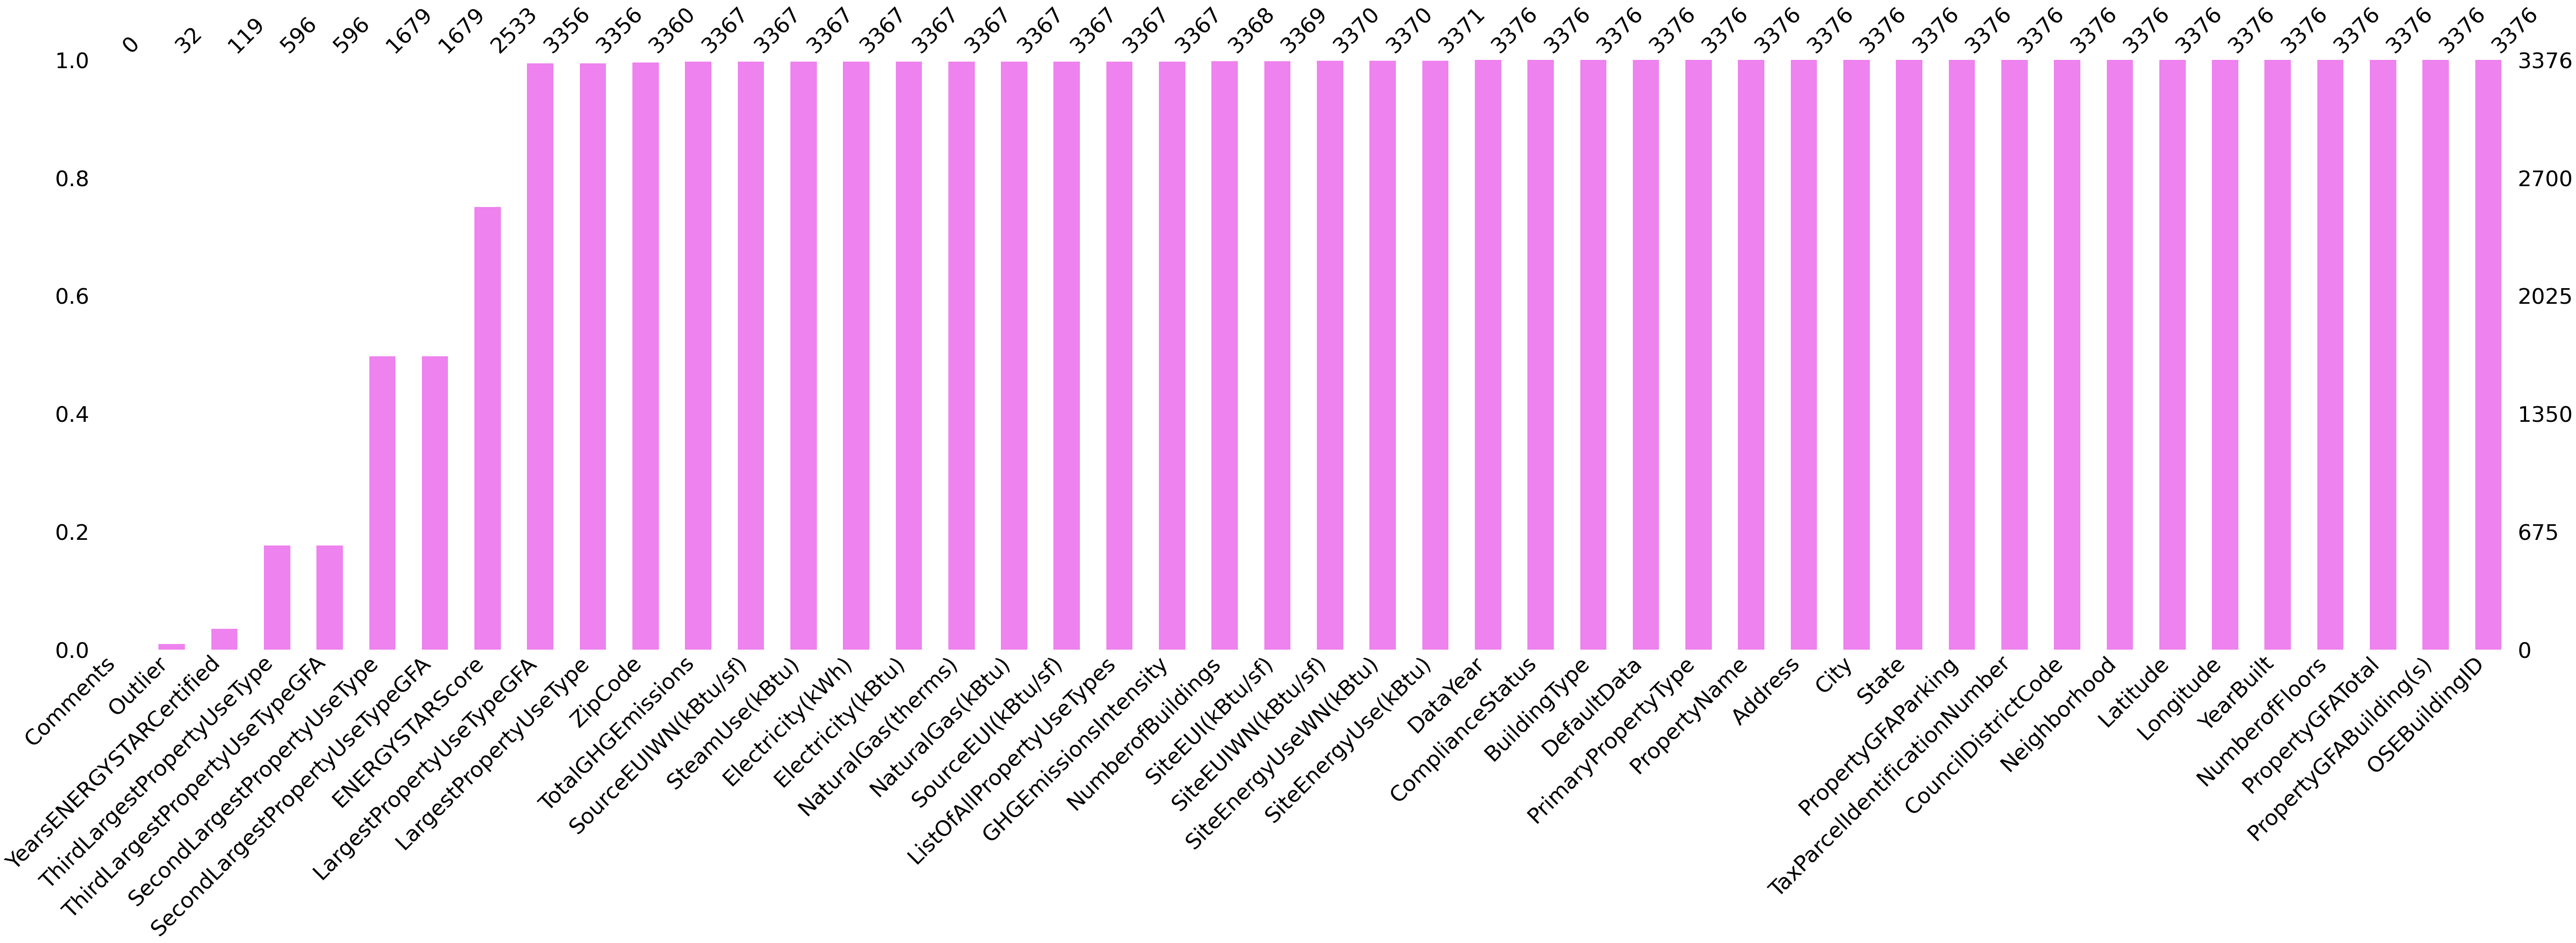

In [10]:
# Présenter les colonnes avec son nombre de données 
missingno.bar(df, color="violet", sort="ascending", figsize=(100,25), fontsize=50);

In [11]:
# Supprimer les colonnes très vides et dont on n'a pas besoin
df=df.drop(['Comments','YearsENERGYSTARCertified'],axis=1)

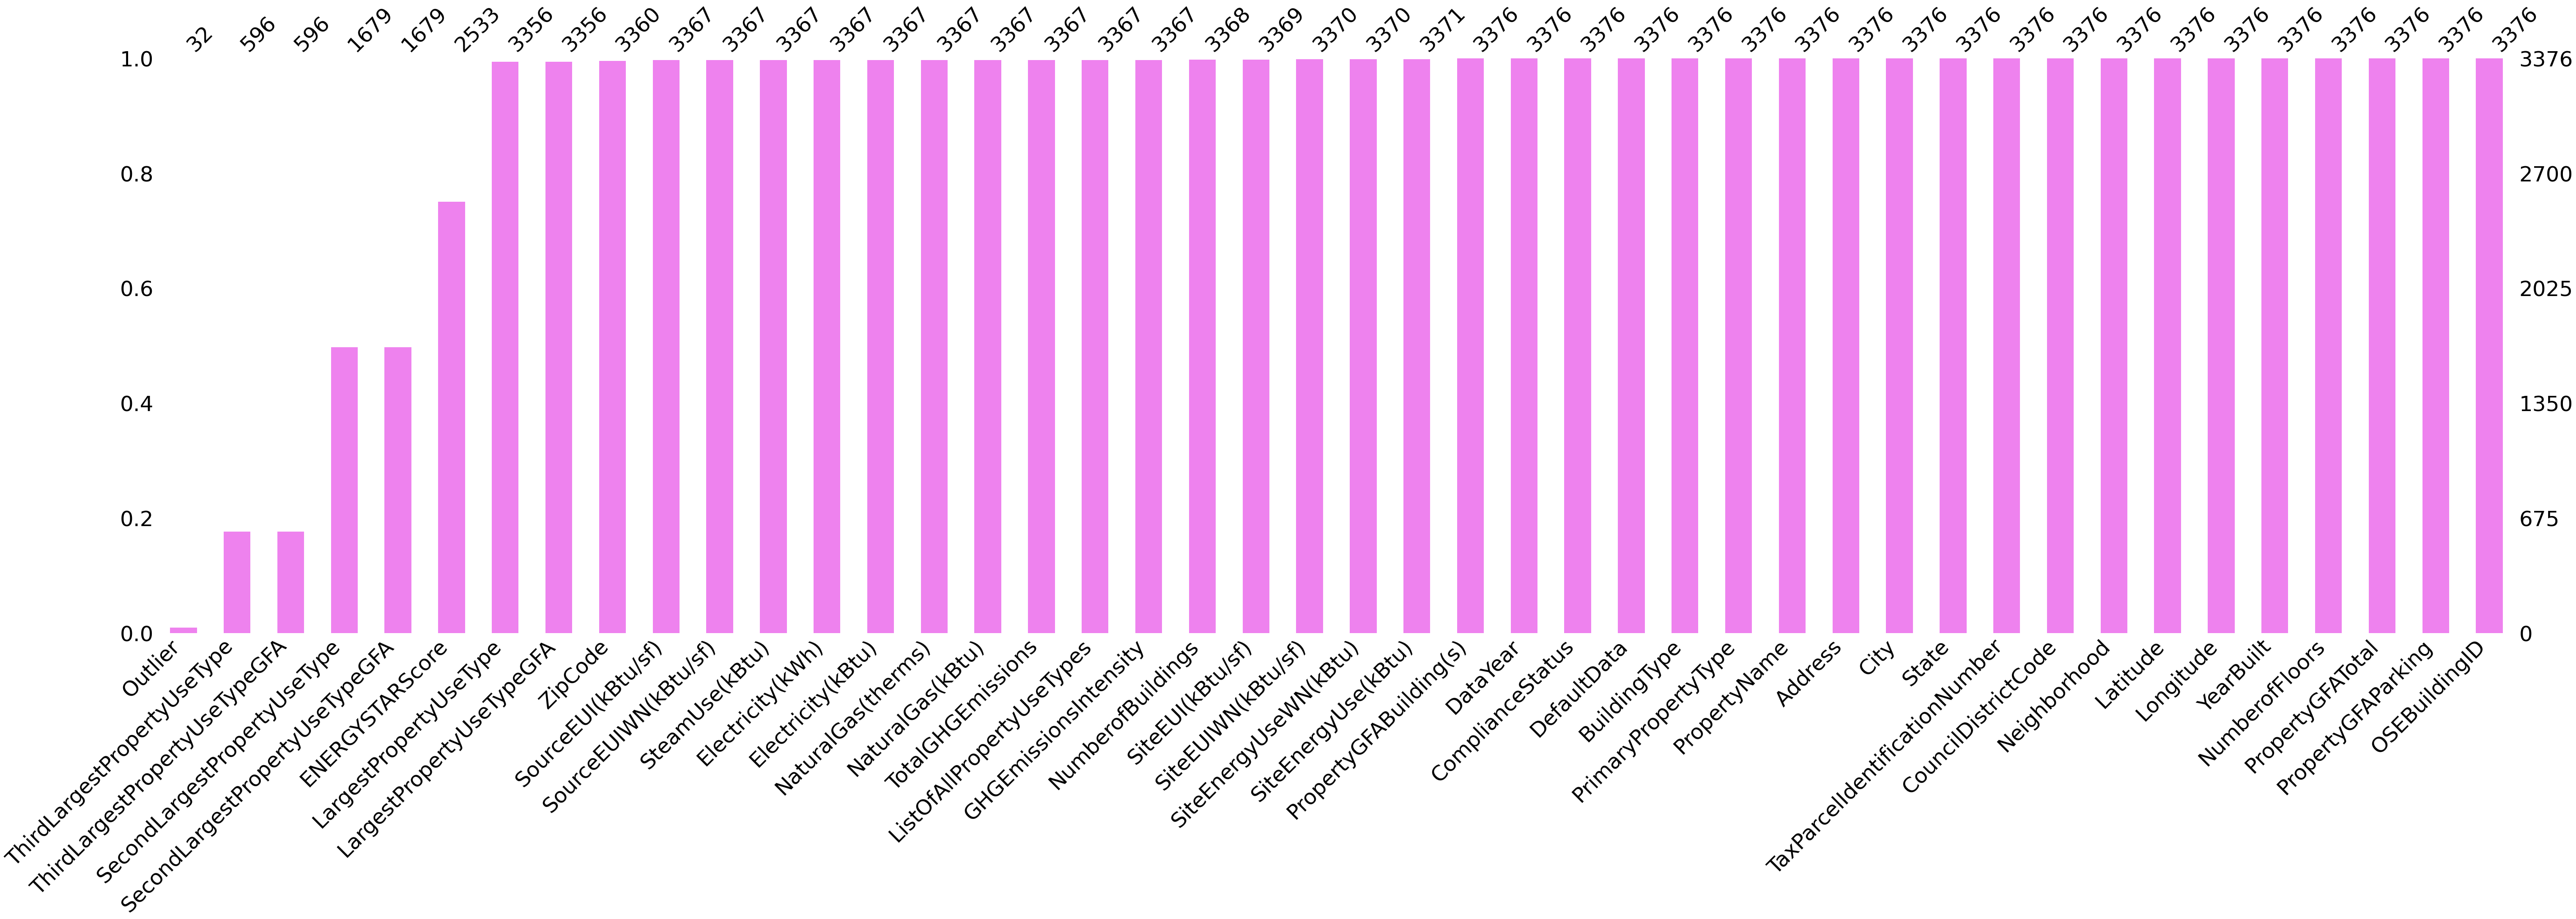

In [12]:
missingno.bar(df, color="violet", sort="ascending", figsize=(100,25), fontsize=50);

## <a name = "2">2. Les points clés dans les données</a>

In [13]:
# Voir toutes les colonnes avec ces valeurs
pd.set_option('display.max_columns',None)
df

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3371      NaN                    1624049080                    2   
3372      NaN                    3558300000                    2   
3373      NaN                    1794501150                    7   
3374      NaN                    7883603155                    1   
3375      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3371                1.0               1            

In [14]:
pd.reset_option('max_columns')

<div style="text-align: justify">
La colonne <b><i>ComplianceStatus</i></b> est la première étape pour préparer les données. Dans cette colonne, on remarque qu'elle contient des valeurs qui décrivent les données:
    <ul>
<li>Compliant = des valeurs conformes </li>
<li>Error - Correct Default Data = des valeurs non réelles, valeurs supposées </li>
<li>Missing Data = des valeurs manquantes </li>
<li>Non-Compliant = des valeurs non_conformes </li>
</ul>    <br>
Donc, on va garder les valeurs 'Compliant'.
</div>

In [15]:
df['ComplianceStatus'].unique() # Les valeurs de la colonne ComplianceStatus

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [16]:
df['ComplianceStatus'].value_counts() # Le nombre de valeurs de la colonne ComplianceStatus

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

<div style="text-align: justify">
La colonne <b><i>Outlier</i></b> est la deuxième étape pour préparer les données. Dans cette colonne, on remarque qu'elle contient des valeurs qui décrivent les données:
    <ul>
<li>High outlier = des valeurs aberrantes (grand aberrant)   </li>
<li>Low outlier = des valeurs aberrantes (petit aberrant) </li>
<li> nan = des valeurs non aberrantes </li>
</ul>    <br>
Donc, on va garder les valeurs 'nan'.
</div>

In [17]:
df['Outlier'].unique() # Les valeurs de la colonne Outlier

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [18]:
df['Outlier'].value_counts() # Le nombre de valeurs de la colonne Outlier

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

<div style="text-align: justify">
Prendre en compte les valeurs 'Compliant':
</div>

In [19]:
df=df.loc[df['ComplianceStatus']=='Compliant']

In [20]:
df['Outlier'].unique() # ne contient pas des valeurs aberrantes

array([nan], dtype=object)

<div style="text-align: justify">
Après avoir pris en compte 'Compliant', on remarque qu'il n'y a pas besoin de prendre en compte le 'Outlier'. Parce qu'en appliquant seulement 'Compliant', le 'Outlier' contient que des nan (des valeurs non aberrantes). 
Donc, pour la première préparation des données, il suffit de prendre en compte le 'Compliant'.
</div>

## <a name = "3"> 3. Choix du target</a>

<div style="text-align: justify">
Le premier target GHG ('Greenhouse gas emissions'), on a TotalGHGEmissions représente la quantité totale des émissions d'un bâtiment. Et le GHGEmissionsIntensity représente cette quantité divisée par rapport aux émissions totales du secteur du bâtiment. Donc, je choisis le  <b> GHGEmissionsIntensity </b> parce que cela donne une échelle facile à lire pour savoir quel est l'important d'un bâtiment par rapport à la pollution.<br>
Le deuxième target la consommation d'énergie, le SiteEUIWN (energy use intensity per surface) représente la quantité totale d'énergie utilisée pour un bâtiment divisée par la surface de la terre du bâtiment. Par contre, le SiteEnergyUseWN représente la quantité totale de l'énergie consommée pour le bâtiment n'importe quelle forme et n'importe quelle source (la source où on a acheté cette énergie).
    Donc, je trouve que c'est mieux de choisir <b> SiteEUIWN </b> parce que cela donne une idée générale sur la consommation et permet de comparer pour n'importe type de bâtiment.<br><br>

<b><i><u>Sources</u></i></b><br>
    <ul>
<li><a href= https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui > What is Energy Use Intensity (EUI)? </a></li>
<li><a href= https://opendatanetwork.herokuapp.com/dataset/data.seattle.gov/h7rm-fz6m#:~:text=SiteEUIWN(kBtu%2Fsf),30%2Dyear%20average%20weather%20conditions. > SiteEUIWN(kBtu/sf)	 </a></li>
<li><a href= https://energystar-mesa.force.com/PortfolioManager/s/article/What-are-Site-Energy-and-Source-Energy-1600088530247 > Site Energy</a></li>
<li><a href=https://www.eea.europa.eu/ims/greenhouse-gas-emission-intensity-of-1 > Greenhouse gas emission intensity of electricity generation in Europe</a></li>        
</ul>
</div>


## <a name = "4"> 4. La fonction df(Choice)</a>

<div style="text-align: justify">
Cette fonction facilite l'analyse du DataFrame et me permet d'avoir tous les DataFrames dont j'ai besoin pour tout le projet. Avec la variable Choice, on peut avoir le DataFrame selon notre besoin.<br><br>
<b> <u>Références de Choice:</u> </b> 
<ul>
<li><b> Choice=1 </b>_Le DataFrame original 'Compliant'</li>
<li><b> Choice=2 </b>_Le DataFrame original avec filtrage 'BuildingType' = 'NonRésidential'  </li>
<li><b> Choice=3 </b>_Le DataFrame original avec des colonnes pourcentage de surface du parking</li>
<li><b> Choice=4 </b>_Le DataFrame original pour avoir la somme des valeurs par tranche des années  </li>
<li><b> Choice='Nom d'un colonne' </b>_Le DataFrame original pour avoir la somme des valeurs par catégorie </li>
</ul>   
<br>
Pourquoi j'ai pris des tranches des années et pas comme range ? Parce qu'il manque des années dans les tranches. Regardez les exemples d'exécution de la fonction <b><i> df() </i></b> au-dessous (exemple df(4)).
</div>

In [5]:
def df(Choice): 
    
    df=pd.read_csv('./2016_Building_Energy_Benchmarking.csv')
    df=df.drop(['Comments','YearsENERGYSTARCertified'],axis=1)
    df=df.loc[df['ComplianceStatus']=='Compliant'] # Prendre en compte le statut 'Compliant'

    if Choice==1: # DataFrame original 'Compliant'
        return df
    
    elif Choice==2: # pour filtrer résidentiel ou non 
        df['FilterResidential']=''  
        for xi in df.index:
            if 'nonresidential' in df['BuildingType'][xi].lower():
                df.loc[xi,['FilterResidential']]='NonResidential'
            else:
                df.loc[xi,['FilterResidential']]='Residential'
        dfBuildingTypeNonResidential=df.loc[df['FilterResidential']=='NonResidential']
        return dfBuildingTypeNonResidential
    
    elif Choice==3: # Prendre en compte la proprtion de surface du parking
        df['PercentageSurfaceParking']=df['PropertyGFAParking']/df['PropertyGFATotal']
        df['PercentageSurfaceWithoutParking']=1-df['PercentageSurfaceParking']
        df['SiteEUIWN(kBtu/sf)Parking']=df['PercentageSurfaceParking']*df['SiteEUIWN(kBtu/sf)']
        df['SiteEUIWN(kBtu/sf)WithoutParking']=df['PercentageSurfaceWithoutParking']*df['SiteEUIWN(kBtu/sf)']
        df['GHGEmissionsIntensityParking']=df['PercentageSurfaceParking']*df['GHGEmissionsIntensity']
        df['GHGEmissionsIntensityWithoutParking']= df['PercentageSurfaceWithoutParking']*df['GHGEmissionsIntensity']                                                                                
        return df
    
    elif type(Choice)==str or Choice==4: # df par catégorie ou par tranche des années 
        Percentage_Parking=df['PropertyGFAParking']/df['PropertyGFATotal']
        Percentage_WithoutParking=1-Percentage_Parking
        Column=Choice
        if Choice==4: 
            NumberOfYears = input("Combien d'années par tranche vous souhaitez entre(1-112):")
            n=int(float(NumberOfYears)) # Le nombre d'années souhaitées par tranche
            while n<1 or n>112 or float(NumberOfYears).is_integer()==False:
                if float(NumberOfYears).is_integer()==False:
                    print("Error: Le nombre doit être entier, Réentrez le nombre d'années:")
                else:
                    print("Error: Le nombre d'année par tranche doit être entre (1-112), Réentrez le nombre d'années:")
                
                NumberOfYears = input("Combien d'années par tranche vous souhaitez entre(1-112):")
                n=int(float(NumberOfYears))
           
            Columnindex=df['YearBuilt']
        else:
            try: Columnindex=df[Column].str.lower()
            except: Columnindex=df[Column]
        dfForindex=pd.DataFrame({'index':Columnindex,
        'SiteEUIWN(kBtu/sf)': df['SiteEUIWN(kBtu/sf)'],                 
        'SiteEUIWN(kBtu/sf)Parking':Percentage_Parking*df['SiteEUIWN(kBtu/sf)'],
        'SiteEUIWN(kBtu/sf)WithoutParking':Percentage_WithoutParking*df['SiteEUIWN(kBtu/sf)'],
        'GHGEmissionsIntensity':df['GHGEmissionsIntensity'],                
        'GHGEmissionsIntensityParking':Percentage_Parking*df['GHGEmissionsIntensity'],
        'GHGEmissionsIntensityWithoutParking': Percentage_WithoutParking*df['GHGEmissionsIntensity'],
        'NumberofFloors':df['NumberofFloors'],
        'NumberofBuildings':df['NumberofBuildings'],
        'PropertyGFABuilding(s)':df['PropertyGFABuilding(s)'], 
        'LargestPropertyUseTypeGFA':df['LargestPropertyUseTypeGFA'],
        'SecondLargestPropertyUseTypeGFA':df['SecondLargestPropertyUseTypeGFA'],
        'ThirdLargestPropertyUseTypeGFA':df['ThirdLargestPropertyUseTypeGFA'],
        'ENERGYSTARScore':df['ENERGYSTARScore']
           })
        dfForindex=dfForindex.groupby(by='index').sum()
        
        if Choice==4:
            n0=0           
            YearsLists=[]
            SumForYearsLists=[]
            if len(dfForindex)%n==0:
                NumberForLoop=range(len(dfForindex))
            else: NumberForLoop=range(int(len(dfForindex)/n)+1)
                
            for x in NumberForLoop:
                dfn=dfForindex.iloc[n0:n0+n].reset_index()
                YearsLists.append(dfn['index'].tolist())
                SumForYearsLists.append(dfn.drop(['index'],axis=1).sum())
                n0+=n
            dfyears=pd.DataFrame(SumForYearsLists)    
            dfyears.index=pd.Series(YearsLists)
            return dfyears
        
        else: return dfForindex    
                    

In [22]:
df(1) # df original

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3370          50221      2016  Nonresidential COS               Other   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3370          High Point Community Center  6920 34th Ave SW  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  SteamUse(kBtu)  \
0     98101.0                    0659000030  ...      2003882.00   
1     98101.0                    0659000220  ...            0.00   
2     98101.0                    0659000475  ...     21566554.00   
3     98101.0                    0659000640  ...      2214446.25   
4     98121.0                    0659000970  ...            0.00   
...       ...                           ...  ...             ...   
3370      NaN                    2524039059  ...            0.00   
3372      NaN                    3558300000  ...            0.00   
3373      NaN                    1794501150  ...            0.00   
3374      NaN                    7883603155  ...            0.00   
3375      NaN                    7857002030  ...            0.00   

     Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0        1.156514e+06       3.946027e+06        12764.529300   
1        9.504252e+05       3.242851e+06        51450.816410   
2        1.451544e+07       4.952666e+07        14938.000000   
3        8.115253e+05       2.768924e+06        18112.130860   
4        1.573449e+06       5.368607e+06        88039.984380   
...               ...                ...                 ...   
3370     1.853347e+05       6.323620e+05         2997.199951   
3372     1.162210e+05       3.965461e+05         5537.299805   
3373     5.252517e+05       1.792159e+06        39737.390630   
3374     1.022480e+05       3.488702e+05         3706.010010   
3375     1.267744e+05       4.325542e+05         7203.419922   

      NaturalGas(kBtu)  DefaultData  ComplianceStatus  Outlier  \
0         1.276453e+06        False         Compliant      NaN   
1         5.145082e+06        False         Compliant      NaN   
2         1.493800e+06        False         Compliant      NaN   
3         1.811213e+06        False         Compliant      NaN   
4         8.803998e+06        False         Compliant      NaN   
...                ...          ...               ...      ...   
3370      2.997200e+05        False         Compliant      NaN   
3372      5.537300e+05        False         Compliant      NaN   
3373      3.

In [23]:
df(2) # df 'BuildingType' = 'NonRésidential'

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3370          50221      2016  Nonresidential COS               Other   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3370          High Point Community Center  6920 34th Ave SW  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0     98101.0                    0659000030  ...      1.156514e+06   
1     98101.0                    0659000220  ...      9.504252e+05   
2     98101.0                    0659000475  ...      1.451544e+07   
3     98101.0                    0659000640  ...      8.115253e+05   
4     98121.0                    0659000970  ...      1.573449e+06   
...       ...                           ...  ...               ...   
3370      NaN                    2524039059  ...      1.853347e+05   
3372      NaN                    3558300000  ...      1.162210e+05   
3373      NaN                    1794501150  ...      5.252517e+05   
3374      NaN                    7883603155  ...      1.022480e+05   
3375      NaN                    7857002030  ...      1.267744e+05   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0         3.946027e+06        12764.529300      1.276453e+06        False   
1         3.242851e+06        51450.816410      5.145082e+06        False   
2         4.952666e+07        14938.000000      1.493800e+06        False   
3         2.768924e+06        18112.130860      1.811213e+06        False   
4         5.368607e+06        88039.984380      8.803998e+06        False   
...                ...                 ...               ...          ...   
3370      6.323620e+05         2997.199951      2.997200e+05        False   
3372      3.965461e+05         5537.299805      5.537300e+05        False   
3373      1.792159e+06        39737.390630      3.973739e+06        False   
3374      3.488702e+05         3706.010010      3.706010e+05        False   
3375      4.325542e+05         7203.419922      7.203420e+05        False   

      ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  \
0            Compliant      NaN             249.98                   2.83   
1            Compliant      NaN             295.86                   2.86   
2            Compliant      NaN            2089.28                   2.19   
3            Compliant      NaN             286.43                   4.67   
4            Compliant      NaN          

In [24]:
df(2)['FilterResidential'].unique()

array(['NonResidential'], dtype=object)

In [25]:
dfSurfaceParking=df(3) # df avec le pourcentage de surface du Parking
dfSurfaceParking

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3370          50221      2016  Nonresidential COS               Other   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3370          High Point Community Center  6920 34th Ave SW  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  ComplianceStatus Outlier  \
0     98101.0                    0659000030  ...         Compliant     NaN   
1     98101.0                    0659000220  ...         Compliant     NaN   
2     98101.0                    0659000475  ...         Compliant     NaN   
3     98101.0                    0659000640  ...         Compliant     NaN   
4     98121.0                    0659000970  ...         Compliant     NaN   
...       ...                           ...  ...               ...     ...   
3370      NaN                    2524039059  ...         Compliant     NaN   
3372      NaN                    3558300000  ...         Compliant     NaN   
3373      NaN                    1794501150  ...         Compliant     NaN   
3374      NaN                    7883603155  ...         Compliant     NaN   
3375      NaN                    7857002030  ...         Compliant     NaN   

      TotalGHGEmissions  GHGEmissionsIntensity  PercentageSurfaceParking  \
0                249.98                   2.83                  0.000000   
1                295.86                   2.86                  0.145453   
2               2089.28                   2.19                  0.205748   
3                286.43                   4.67                  0.000000   
4                505.01                   2.88                  0.353115   
...                 ...                    ...                       ...   
3370              20.33                   1.11                  0.000000   
3372              32.17                   2.01                  0.000000   
3373             223.54                  16.99                  0.000000   
3374              22.11                   1.57                  0.000000   
3375              41.27                   2.26                  0.000000   

      PercentageSurfaceWithoutParking  SiteEUIWN(kBtu/sf)Parking  \
0                            1.000000                   0.000000   
1                            0.854547                  14.239863   
2                            0.794252                  20.101608   
3                            1.000000                   0.000000   
4 

In [26]:
dfSurfaceParking.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsInt

In [27]:
dfSurfaceParking['PercentageSurfaceParking'].mean() # Pourcentage de surface Parking

0.042829886453555045

In [28]:
1-dfSurfaceParking['PercentageSurfaceParking'].mean() # Pourcentage de surface sans Parking

0.957170113546445

<div style="text-align: justify">
On remarque que la surface du parking a un effet très faible. C'est pour cela, on peut ignorer l'effet de la surface du parking.
</div>

In [29]:
# Les valeurs des deux targets sans la surface du Parking
dfSurfaceParking[['GHGEmissionsIntensityWithoutParking','SiteEUIWN(kBtu/sf)WithoutParking']]

GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking
0                                2.830000                         84.300003
1                                2.444004                         83.660139
2                                1.739411                         77.598389
3                                4.670000                        113.300003
4                                1.863028                         76.785201
...                                   ...                               ...
3370                             1.110000                         56.200001
3372                             2.010000                         65.900002
3373                            16.990000                        460.100006
3374                             1.570000                         55.500000
3375                             2.260000                         70.900002

[3211 rows x 2 columns]

<div style="text-align: justify">
Donc, on va utiliser les deux targets sans Parking:<br>
    
<ul>
<li><b> Premier target </b> ytarget='GHGEmissionsIntensityWithoutParking'</li>
<li><b> Deuxième target </b> ytarget='SiteEUIWN(kBtu/sf)WithoutParking'</li>
</ul>
</div>

In [30]:
df(4) # df avec tranches des années 8

Combien d'années par tranche vous souhaitez entre(1-112):8


SiteEUIWN(kBtu/sf)  \
[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907]         8237.300007   
[1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915]        10089.300021   
[1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923]         7536.100007   
[1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931]        17955.499980   
[1932, 1935, 1936, 1937, 1938, 1939, 1940, 1941]         1786.300013   
[1942, 1944, 1945, 1946, 1947, 1948, 1949, 1950]         5977.199993   
[1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958]         9628.600046   
[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966]        18361.600011   
[1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974]        16860.300040   
[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982]        14275.799985   
[1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990]        16361.299987   
[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998]        16123.199981   
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]        23796.699971   
[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]        17652.099959   
[2015]                                                   1378.400007   

                                                  SiteEUIWN(kBtu/sf)Parking  \
[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907]                  74.309127   
[1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915]                  80.239126   
[1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923]                 193.027769   
[1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931]                 341.292466   
[1932, 1935, 1936, 1937, 1938, 1939, 1940, 1941]                  26.947400   
[1942, 1944, 1945, 1946, 1947, 1948, 1949, 1950]                 176.775860   
[1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958]                  67.768420   
[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966]                 649.208678   
[1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974]                 557.667255   
[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982]                 890.989949   
[1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990]                1498.067328   
[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998]                1163.495307   
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]                3720.889887   
[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]                1594.392092   
[2015]                                                           150.943285   

                                                  SiteEUIWN(kBtu/sf)WithoutParking  \
[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907]                       8162.990879   
[1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915]                      10009.060895   
[1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923]                       7343.072238   
[1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931]                      17614.207514   
[1932, 1935, 1936, 1937, 1938, 1939, 1940, 1941]                       1759.352612   
[1942, 1944, 1945, 1946, 1947, 1948, 1949, 1950]                       5800.424133   
[1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958]                       9560.831626   
[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966]                      17712.391333   
[1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974]                      16302.632785   
[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982]                      13384.810036   
[1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990]                      14863.232659   
[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998]                      14959.704674   
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]                      20075.810084   
[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]                      16057.707867   
[2015]                                                                 1227.456722   

                                                  GHGEmissionsIntensity  \
[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907]                 199.23   
[1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915]                 258.23   
[1916, 1917, 1918, 1919, 1920,

In [31]:
df(4) # df avec tranches des années 3

Combien d'années par tranche vous souhaitez entre(1-112):3


SiteEUIWN(kBtu/sf)  SiteEUIWN(kBtu/sf)Parking  \
[1900, 1901, 1902]         4442.700008                  74.309127   
[1903, 1904, 1905]         1337.000002                   0.000000   
[1906, 1907, 1908]         3985.400002                  10.377537   
[1909, 1910, 1911]         4723.700016                  52.913539   
[1912, 1913, 1914]         3279.199994                  16.948050   
[1915, 1916, 1917]         2429.400018                   8.351901   
[1918, 1919, 1920]         2230.099993                  98.014079   
[1921, 1922, 1923]         3435.200003                  86.661789   
[1924, 1925, 1926]         7576.299961                 126.634265   
[1927, 1928, 1929]         7488.900019                 182.172037   
[1930, 1931, 1932]         3038.800005                  32.486165   
[1935, 1936, 1937]          311.499999                   0.000000   
[1938, 1939, 1940]          973.500011                  26.947400   
[1941, 1942, 1944]          782.999988                   0.000000   
[1945, 1946, 1947]         1738.499997                  95.271666   
[1948, 1949, 1950]         3808.500006                  81.504194   
[1951, 1952, 1953]         3506.300038                  18.676973   
[1954, 1955, 1956]         3995.799991                  28.164748   
[1957, 1958, 1959]         3347.200005                  62.377983   
[1960, 1961, 1962]         8857.900001                 228.063738   
[1963, 1964, 1965]         5711.499996                  36.460616   
[1966, 1967, 1968]         7211.200014                 438.847494   
[1969, 1970, 1971]         7763.100020                 276.041531   
[1972, 1973, 1974]         4457.500033                 186.011271   
[1975, 1976, 1977]         3886.300028                 344.514493   
[1978, 1979, 1980]         7052.899985                 354.356785   
[1981, 1982, 1983]         4612.899979                 350.109612   
[1984, 1985, 1986]         5949.699996                 496.314494   
[1987, 1988, 1989]         6654.999981                 640.800473   
[1990, 1991, 1992]         6327.499994                 459.080505   
[1993, 1994, 1995]         4543.999987                 149.450763   
[1996, 1997, 1998]         7732.000003                 757.925459   
[1999, 2000, 2001]        11421.600017                2207.509896   
[2002, 2003, 2004]         7400.499973                1008.294063   
[2005, 2006, 2007]         6888.899965                 596.336637   
[2008, 2009, 2010]         7470.900015                1096.465324   
[2011, 2012, 2013]         5715.699961                 298.889515   
[2014, 2015]               3929.600007                 258.729829   

                    SiteEUIWN(kBtu/sf)WithoutParking  GHGEmissionsIntensity  \
[1900, 1901, 1902]                       4368.390881                 109.19   
[1903, 1904, 1905]                       1337.000002                  31.91   
[1906, 1907, 1908]                       3975.022464                 104.85   
[1909, 1910, 1911]                       4670.786477                 115.98   
[1912, 1913, 1914]                       3262.251944                  83.00   
[1915, 1916, 1917]                       2421.048117                  64.05   
[1918, 1919, 1920]                       2132.085914                  66.17   
[1921, 1922, 1923]                       3348.538214                 100.63   
[1924, 1925, 1926]                       7449.665696                 215.03   
[1927, 1928, 1929]                       7306.727982                 214.75   
[1930, 1931, 1932]                       3006.313840                  95.59   
[1935, 1936, 1937]                        311.499999                   6.12   
[1938, 1939, 1940]                        946.552611                  23.99   
[1941, 1942, 1944]                        782.999988                   8.22   
[1945, 1946, 1947]                       1643.228331                  47.22   
[1948, 1949, 1950]                       3726.995811            

In [32]:
df(4).index[4] # exemple pourquoi c'est tranches et pas range

Combien d'années par tranche vous souhaitez entre(1-112):8


[1932, 1935, 1936, 1937, 1938, 1939, 1940, 1941]

<div style="text-align: justify">
On remarque dans la tranche ci-dessus entre 1932 et 1935, il manque deux années. C'est pour cela, ça ne peut pas être range.
</div>

In [33]:
df('BuildingType') # df par catégorie

SiteEUIWN(kBtu/sf)  SiteEUIWN(kBtu/sf)Parking  \
index                                                                 
campus                       2562.299999                  24.455649   
multifamily hr (10+)         5813.499996                 196.691613   
multifamily lr (1-4)        36858.899996                 467.170514   
multifamily mr (5-9)        23414.799969                 786.679257   
nonresidential             108586.200024                9419.391728   
nonresidential cos           8311.200020                 291.625189   
nonresidential wa              46.200001                   0.000000   
sps-district k-12             426.600004                   0.000000   

                      SiteEUIWN(kBtu/sf)WithoutParking  GHGEmissionsIntensity  \
index                                                                           
campus                                     2537.844350                 100.07   
multifamily hr (10+)                       5616.808384                 131.08   
multifamily lr (1-4)                      36391.729482                 672.05   
multifamily mr (5-9)                      22628.120712                 429.39   
nonresidential                            99166.808295                2240.70   
nonresidential cos                         8019.574831                 229.46   
nonresidential wa                            46.200001                   0.33   
sps-district k-12                           426.600004                  10.51   

                      GHGEmissionsIntensityParking  \
index                                                
campus                                    0.297160   
multifamily hr (10+)                      3.321821   
multifamily lr (1-4)                      6.702296   
multifamily mr (5-9)                     11.697646   
nonresidential                          118.517112   
nonresidential cos                        4.110677   
nonresidential wa                         0.000000   
sps-district k-12                         0.000000   

                      GHGEmissionsIntensityWithoutParking  NumberofFloors  \
index                                                                       
campus                                          99.772840              60   
multifamily hr (10+)                           127.758179            1919   
multifamily lr (1-4)                           665.347704            3435   
multifamily mr (5-9)                           417.692354            3454   
nonresidential                                2122.182888            6304   
nonresidential cos                             225.349323             236   
nonresidential wa                                0.330000               1   
sps-district k-12                               10.510000              19   

                      NumberofBuildings  PropertyGFABuilding(s)  \
index                                                             
campus                            249.0                16214166   
multifamily hr (10+)              107.0                22041085   
multifamily lr (1-4)             1050.0                42264365   
multifamily mr (5-9)              582.0                50042037   
nonresidential                   1478.0               141467182   
nonresidential cos                 87.0                 7109155   
nonresidential wa                   1.0                   68072   
sps-district k-12                  10.0                 1535573   

                      LargestPropertyUseTypeGFA  \
index                                             
campus                               15873467.0   
multifamily hr (10+)                 19818276.0   
multifamily lr (1-4)                 38238625.0   
multifamily mr (5-9)                 41555272.0   
nonresidential                      130523810.0   
nonresidential cos                    6469937.0   
nonresidential wa                       68916.0   
sps-district k-12                     1379935.0   

      

In [34]:
df('BuildingType').isna().sum()

SiteEUIWN(kBtu/sf)                     0
SiteEUIWN(kBtu/sf)Parking              0
SiteEUIWN(kBtu/sf)WithoutParking       0
GHGEmissionsIntensity                  0
GHGEmissionsIntensityParking           0
GHGEmissionsIntensityWithoutParking    0
NumberofFloors                         0
NumberofBuildings                      0
PropertyGFABuilding(s)                 0
LargestPropertyUseTypeGFA              0
SecondLargestPropertyUseTypeGFA        0
ThirdLargestPropertyUseTypeGFA         0
ENERGYSTARScore                        0
dtype: int64

In [35]:
df('PrimaryPropertyType') # df par catégorie

SiteEUIWN(kBtu/sf)  SiteEUIWN(kBtu/sf)Parking  \
index                                                                        
distribution center                 1980.300004                   6.242857   
high-rise multifamily               5407.900001                 164.142607   
hospital                            1926.800015                  85.728492   
hotel                               6404.099983                 720.095149   
k-12 school                         2794.900005                   0.000000   
laboratory                          2975.099983                 285.216623   
large office                       11041.499985                1951.382207   
low-rise multifamily               35380.000000                 412.479138   
medical office                      3548.899994                 766.178542   
mid-rise multifamily               22499.599962                 725.108095   
mixed use property                 11908.800056                1913.700103   
other                              26977.699995                1881.532466   
refrigerated warehouse               944.099981                   0.000000   
residence hall                      1356.599997                  22.100518   
restaurant                          2120.700020                   0.000000   
retail store                        5797.100003                  78.812715   
self-storage facility                606.600000                  13.169827   
senior care community               3711.400011                 484.890596   
small- and mid-sized office        17943.499962                1131.840070   
supermarket / grocery store         9723.500038                 460.965736   
university                          1610.899996                  35.969753   
warehouse                           6830.300020                   8.434835   
worship facility                    2529.399997                  38.023620   

                             SiteEUIWN(kBtu/sf)WithoutParking  \
index                                                           
distribution center                               1974.057147   
high-rise multifamily                             5243.757395   
hospital                                          1841.071522   
hotel                                             5684.004834   
k-12 school                                       2794.900005   
laboratory                                        2689.883360   
large office                                      9090.117778   
low-rise multifamily                             34967.520862   
medical office                                    2782.721452   
mid-rise multifamily                             21774.491867   
mixed use property                                9995.099953   
other                                            25096.167529   
refrigerated warehouse                             944.099981   
residence hall                                    1334.499478   
restaurant                                        2120.700020   
retail store                                      5718.287288   
self-storage facility                              593.430174   
senior care community                             3226.509415   
small- and mid-sized office                      16811.659892   
supermarket / grocery store                       9262.534302   
university                                        1574.930243   
warehouse                                         6821.865186   
worship facility                                  2491.376376   

                             GHGEmissionsIntensity  \
index                                                
distribution center                          40.42   
high-rise multifamily                       116.57   
hospital                                     74.11   
hotel                                       190.42   
k-12 school                                  94.35   
laboratory                                   86.71   
large office        

## <a name = "5"> 5. La fonction feature_engineering(Variable)</a>

<div style="text-align: justify">
Sur la demande de l'évaluateur, j'ai ajouté cette fonction pour transformer les variables catégorielle avec la méthode OneHotEncoding et avoir des variables feature engineering.<br><br>
<b> <u>Références de Variable:</u> </b> 
<ul>
<li><b> Choice='Neighborhood' </b>_Transforme la variable catégorielle 'Neighborhood' avec la méthode OneHotEncoding </li>
<li><b> Choice='CategoryYears' </b>_Transformes la variable catégorielle 'Tranche d’âge du bâtiment' avec la méthode OneHotEncoding </li>
<li><b> Choice='Binary' </b>_Transforme les variables 'gaz naturel' et 'steam_use' en variables binaires </li>
<li><b> Choice='Top5' </b>_Des variables indiquent le pourcentage de la surface des top 5 des PropertyUseTypes(Parking
Office,Retail Store, Other, Restaurant)  </li>
</ul>   
<br>

</div>

In [3]:
def feature_engineering(Variable):
    enc=OneHotEncoder(handle_unknown='ignore')
    if Variable=='Neighborhood':
        dfNeighborhood=df('Neighborhood').reset_index()
        XToEncode=dfNeighborhood[['index']]
        XEncoded= pd.DataFrame(enc.fit_transform(XToEncode).toarray())
        XEncoded.columns=dfNeighborhood['index']
        dfWithXEncoded=XEncoded
        dfWithXEncoded['GHGEmissionsIntensityWithoutParking']=dfNeighborhood['GHGEmissionsIntensityWithoutParking']
        dfWithXEncoded['SiteEUIWN(kBtu/sf)WithoutParking']=dfNeighborhood['SiteEUIWN(kBtu/sf)WithoutParking']
        return dfWithXEncoded
    if Variable=='CategoryYears':
        dfCategoryYears=df(4).reset_index()
        dfCategoryYears['NumberOfYears']=dfCategoryYears['index'].apply(lambda x: len(x))
        NumberStandardOfYears=dfCategoryYears['NumberOfYears'][0]   
        dfCategoryYears=dfCategoryYears.loc[dfCategoryYears['NumberOfYears']==NumberStandardOfYears]
        dfCategoryYears['RangeYears']=dfCategoryYears['index'].apply(lambda x: list(range(x[0],x[-1]+1)))
        dfCategoryYears['NumberOfYearsForRangeYears']=dfCategoryYears['RangeYears'].apply(lambda x: len(x))
        dfCategoryYears=dfCategoryYears.loc[dfCategoryYears['NumberOfYearsForRangeYears']==NumberStandardOfYears]
        dfCategoryYears['MaxYear']=dfCategoryYears['index'].apply(lambda x: max(x))
        dfCategoryYears=dfCategoryYears.reset_index()
        XToEncode=dfCategoryYears[['MaxYear']]
        XEncoded= pd.DataFrame(enc.fit_transform(XToEncode).toarray())
        XEncoded.columns=dfCategoryYears['MaxYear']
        dfWithXEncoded=XEncoded
        dfWithXEncoded['GHGEmissionsIntensityWithoutParking']=dfCategoryYears['GHGEmissionsIntensityWithoutParking']
        dfWithXEncoded['SiteEUIWN(kBtu/sf)WithoutParking']=dfCategoryYears['SiteEUIWN(kBtu/sf)WithoutParking']
        return dfWithXEncoded
    if Variable=='Binary':
        dfBinary=df(3).reset_index()
        dfBinary['BinaryNaturalGas(kBtu)']=dfBinary['NaturalGas(kBtu)'].apply(lambda x: 0 if x==0 else 1)
        dfBinary['BinarySteamUse(kBtu)']=dfBinary['SteamUse(kBtu)'].apply(lambda x: 0 if x==0 else 1)
        dfFeature=dfBinary[['BinaryNaturalGas(kBtu)','BinarySteamUse(kBtu)',
                             'GHGEmissionsIntensityWithoutParking','SiteEUIWN(kBtu/sf)WithoutParking']]
        dfFeature=dfFeature.dropna()
        return dfFeature
    if Variable=='Top5':
        Top5=['Parking','Office','Retail Store', 'Other', 'Restaurant']
        First=df(3)[['LargestPropertyUseType','LargestPropertyUseTypeGFA',
                     'GHGEmissionsIntensityWithoutParking','SiteEUIWN(kBtu/sf)WithoutParking']]
        First=First.groupby(by='LargestPropertyUseType').sum().reset_index()
        First=First.loc[First['LargestPropertyUseType'].isin(Top5)].reset_index().drop('index',axis=1)
        First['FirstSurface %']=100*First['LargestPropertyUseTypeGFA']/sum(First['LargestPropertyUseTypeGFA'])
        First['FirstSurface %']=First['FirstSurface %'].round(2)
        Second=df(3)[['SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
                     'GHGEmissionsIntensityWithoutParking','SiteEUIWN(kBtu/sf)WithoutParking']]
        Second=Second.groupby(by='SecondLargestPropertyUseType').sum().reset_index()
        Second=Second.loc[Second['SecondLargestPropertyUseType'].isin(Top5)].reset_index().drop('index',axis=1)
        Second['SecondSurface %']=100*Second['SecondLargestPropertyUseTypeGFA']/sum(Second['SecondLargestPropertyUseTypeGFA'])
        Second['SecondSurface %']=Second['SecondSurface %'].round(2)
        Third=df(3)[['ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA',
                    'GHGEmissionsIntensityWithoutParking','SiteEUIWN(kBtu/sf)WithoutParking']]
        Third=Third.groupby(by='ThirdLargestPropertyUseType').sum().reset_index()
        Third=Third.loc[Third['ThirdLargestPropertyUseType'].isin(Top5)].reset_index().drop('index',axis=1)
        Third['ThirdSurface %']=100*Third['ThirdLargestPropertyUseTypeGFA']/sum(Third['ThirdLargestPropertyUseTypeGFA'])
        Third['ThirdSurface %']=Third['ThirdSurface %'].round(2)
        dfTop5=pd.concat([First,Second,Third],axis=1)
        return dfTop5
   

In [67]:
feature_engineering('Neighborhood')

index  ballard  central  delridge  delridge neighborhoods  downtown  east  \
0          1.0      0.0       0.0                     0.0       0.0   0.0   
1          0.0      1.0       0.0                     0.0       0.0   0.0   
2          0.0      0.0       1.0                     0.0       0.0   0.0   
3          0.0      0.0       0.0                     1.0       0.0   0.0   
4          0.0      0.0       0.0                     0.0       1.0   0.0   
5          0.0      0.0       0.0                     0.0       0.0   1.0   
6          0.0      0.0       0.0                     0.0       0.0   0.0   
7          0.0      0.0       0.0                     0.0       0.0   0.0   
8          0.0      0.0       0.0                     0.0       0.0   0.0   
9          0.0      0.0       0.0                     0.0       0.0   0.0   
10         0.0      0.0       0.0                     0.0       0.0   0.0   
11         0.0      0.0       0.0                     0.0       0.0   0.0   
12         0.0      0.0       0.0                     0.0       0.0   0.0   
13         0.0      0.0       0.0                     0.0       0.0   0.0   

index  greater duwamish  lake union  magnolia / queen anne  north  northeast  \
0                   0.0         0.0                    0.0    0.0        0.0   
1                   0.0         0.0                    0.0    0.0        0.0   
2                   0.0         0.0                    0.0    0.0        0.0   
3                   0.0         0.0                    0.0    0.0        0.0   
4                   0.0         0.0                    0.0    0.0        0.0   
5                   0.0         0.0                    0.0    0.0        0.0   
6                   1.0         0.0                    0.0    0.0        0.0   
7                   0.0         1.0                    0.0    0.0        0.0   
8                   0.0         0.0                    1.0    0.0        0.0   
9                   0.0         0.0                    0.0    1.0        0.0   
10                  0.0         0.0                    0.0    0.0        1.0   
11                  0.0         0.0                    0.0    0.0        0.0   
12                  0.0         0.0                    0.0    0.0        0.0   
13                  0.0         0.0                    0.0    0.0        0.0   

index  northwest  southeast  southwest  GHGEmissionsIntensityWithoutParking  \
0            0.0        0.0        0.0                           142.611421   
1            0.0        0.0        0.0                           152.274350   
2            0.0        0.0        0.0                            81.941399   
3            0.0        0.0        0.0                             1.110000   
4            0.0        0.0        0.0                           727.153760   
5            0.0        0.0        0.0                           646.712345   
6            0.0        0.0        0.0                           406.935041   
7            0.0        0.0        0.0                           229.699187   
8            0.0        0.0        0.0                           424.534253   
9            0.0        0.0        0.0                           132.465245   
10           0.0        0.0        0.0                           282.928596   
11           1.0        0.0        0.0                           205.365105   
12           0.0        1.0        0.0                            84.194128   
13           0.0        0.0        1.0                           151.018458   

index  SiteEUIWN(kBtu/sf)WithoutParking  
0                           6953.004633  
1                           6789.029119  
2                           4423.605503  
3                             56.200001  
4                          34352.646971  
5                          24415.660901  
6                          18995.500703  
7                          13910.733971  
8                          20351.625869  
9                           8156.4542

In [6]:
feature_engineering('CategoryYears')

Combien d'années par tranche vous souhaitez entre(1-112):10


MaxYear  1909  1919  1929  1962  1972  1982  1992  2002  2012  \
0         1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1         0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
6         0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
7         0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
8         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

MaxYear  GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking  
0                                 285.268577                      11325.267114  
1                                 242.563675                       9559.986510  
2                                 565.525573                      19386.264067  
3                                 415.707949                      17626.693550  
4                                 403.557466                      20891.397466  
5                                 256.891432                      16699.351722  
6                                 323.362146                      18454.313566  
7                                 401.953357                      23305.183929  
8                                 333.734422                      19300.682209

In [68]:
feature_engineering('CategoryYears')

Combien d'années par tranche vous souhaitez entre(1-112):4


MaxYear  1903  1907  1911  1915  1919  1923  1927  1931  1941  1950  ...  \
0         1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1         0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   
6         0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  ...   
7         0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   
8         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   
9         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  ...   
10        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
12        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
13        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
14        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
15        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
16        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
17        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
18        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
19        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
20        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
21        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
22        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
23        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
24        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
25        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

MaxYear  1986  1990  1994  1998  2002  2006  2010  2014  \
0         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
8         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
9         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
10        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
12        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
13        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
14        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
15        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
16        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
17        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
18        1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
19        0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
20        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
21        0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
22        0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
23        0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
24        0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
25        0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

MaxYear  GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking  
0                                 111.539456                       4545.690884  
1                                  86.590000                       3617.299995  
2                                 161.777552                       6188.208945  
3                            

In [69]:
feature_engineering('Binary')

BinaryNaturalGas(kBtu)  BinarySteamUse(kBtu)  \
0                          1                     1   
1                          1                     0   
2                          1                     1   
3                          1                     1   
4                          1                     0   
...                      ...                   ...   
3206                       1                     0   
3207                       1                     0   
3208                       1                     0   
3209                       1                     0   
3210                       1                     0   

      GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking  
0                                2.830000                         84.300003  
1                                2.444004                         83.660139  
2                                1.739411                         77.598389  
3                                4.670000                        113.300003  
4                                1.863028                         76.785201  
...                                   ...                               ...  
3206                             1.110000                         56.200001  
3207                             2.010000                         65.900002  
3208                            16.990000                        460.100006  
3209                             1.570000                         55.500000  
3210                             2.260000                         70.900002  

[3206 rows x 4 columns]

In [4]:
FETop5=feature_engineering('Top5')
FETop5

LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                 Office                 59617278.0   
1                  Other                  8024345.0   
2                Parking                  4439882.0   
3             Restaurant                   319611.0   
4           Retail Store                  5996141.0   

   GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking  \
0                           432.372809                      28000.039236   
1                           185.760810                       8728.151283   
2                            20.183324                       2264.526351   
3                            81.179261                       2312.581802   
4                           123.930619                       6304.263481   

   FirstSurface % SecondLargestPropertyUseType  \
0           76.05                       Office   
1           10.24                        Other   
2            5.66                      Parking   
3            0.41                   Restaurant   
4            7.65                 Retail Store   

   SecondLargestPropertyUseTypeGFA  GHGEmissionsIntensityWithoutParking  \
0                     4.030780e+06                           311.326648   
1                     9.298160e+05                            85.020837   
2                     3.260579e+07                           806.405083   
3                     3.070160e+05                            86.414945   
4                     2.271386e+06                           164.562492   

   SiteEUIWN(kBtu/sf)WithoutParking  SecondSurface %  \
0                      13880.751107            10.04   
1                       3951.030719             2.32   
2                      47335.900466            81.22   
3                       3396.527442             0.76   
4                       8414.271308             5.66   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                      Office                    9.654820e+05   
1                       Other                    7.332420e+05   
2                     Parking                    1.033404e+06   
3                  Restaurant                    4.545540e+05   
4                Retail Store                    1.012685e+06   

   GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking  \
0                           149.451885                       6873.426031   
1                            32.805700                       2940.007538   
2                            85.066072                       4306.077753   
3                            61.507388                       3169.399011   
4                            90.996056                       5046.988373   

   ThirdSurface %  
0           22.99  
1           17.46  
2           24.61  
3           10.82  
4           24.12

In [8]:
FETop5_Variable1=FETop5.iloc[:,0:5]
FETop5_Variable1

LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                 Office                 59617278.0   
1                  Other                  8024345.0   
2                Parking                  4439882.0   
3             Restaurant                   319611.0   
4           Retail Store                  5996141.0   

   GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking  \
0                           432.372809                      28000.039236   
1                           185.760810                       8728.151283   
2                            20.183324                       2264.526351   
3                            81.179261                       2312.581802   
4                           123.930619                       6304.263481   

   FirstSurface %  
0           76.05  
1           10.24  
2            5.66  
3            0.41  
4            7.65

In [9]:
FETop5_Variable2=FETop5.iloc[:,5:10]
FETop5_Variable2

SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                       Office                     4.030780e+06   
1                        Other                     9.298160e+05   
2                      Parking                     3.260579e+07   
3                   Restaurant                     3.070160e+05   
4                 Retail Store                     2.271386e+06   

   GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking  \
0                           311.326648                      13880.751107   
1                            85.020837                       3951.030719   
2                           806.405083                      47335.900466   
3                            86.414945                       3396.527442   
4                           164.562492                       8414.271308   

   SecondSurface %  
0            10.04  
1             2.32  
2            81.22  
3             0.76  
4             5.66

In [11]:
FETop5_Variable3=FETop5.iloc[:,10:]
FETop5_Variable3

ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                      Office                    9.654820e+05   
1                       Other                    7.332420e+05   
2                     Parking                    1.033404e+06   
3                  Restaurant                    4.545540e+05   
4                Retail Store                    1.012685e+06   

   GHGEmissionsIntensityWithoutParking  SiteEUIWN(kBtu/sf)WithoutParking  \
0                           149.451885                       6873.426031   
1                            32.805700                       2940.007538   
2                            85.066072                       4306.077753   
3                            61.507388                       3169.399011   
4                            90.996056                       5046.988373   

   ThirdSurface %  
0           22.99  
1           17.46  
2           24.61  
3           10.82  
4           24.12

## <a name = "6"> 6. Présenter les données</a>

### <a name = "61"> 6.1. Sans les features ['NumberofFloors','NumberofBuildings','PropertyGFABuilding(s)'] </a>

<div style="text-align: justify">
Avec la fonction <b><i> barplot(Choice,FigureHeight) </i></b> je vais présenter les deux targets (ytarget) par tranches des années ou par catégorie. A noter qu'il faut mettre une valeur pour la variable <b><i> Choice </i></b> qui vient de la fonction <b><i> df() </i></b>. Mais il ne faut pas choisir les valeurs (1,2 ou 3), parce que simplement ce ne sont pas les DataFrames préparés pour cette présentation. Concernant la variable <b><i> FigureHeight</i></b>, elle représente la hauteur de la figure. Si la figure est pressée, on peut adapter la hauteur avec cette variable. J'ai ajouté des couleurs aléatoires, si vous souhaitez changer les couleurs, n'hésitez pas à ré-exécuter la fonction pour avoir des couleurs différents. 
</div>

In [36]:
def barplot(Choice,FigureHeight):
    
    if Choice==1 or Choice==2 or Choice==3:
        ToReturn=print('Les Choice ne peuvent pas avoir la valoir 1,2 ou 3')
        return ToReturn
    else:
        dfb=df(Choice).reset_index()
        colors = []
        AvoidColorsToUseBackgroundWhite=['#F0F8FF','#F0FFFF','#FFFAF0','#FFFFFF','#F5F5F5','#FFFAFA','#F4F4F4','#F5FFFA'
                                    ,'#FFFFF0','#FCFCFC','#FAFAFA','#F7F7F7','#F2F2F2','#F8F8FF']
        for i in range(len(dfb)):
            colorHex='#%06X' % np.random.randint(0, 0xFFFFFF)
            while colorHex in AvoidColorsToUseBackgroundWhite:
                colorHex='#%06X' % np.random.randint(0, 0xFFFFFF)
            colors.append(colorHex) 

        allfig=[]
        if Choice==4:
            Choice='Tranches des années'
        for x in ['GHGEmissionsIntensityWithoutParking','SiteEUIWN(kBtu/sf)WithoutParking']:  
            dfbForBarh=pd.DataFrame({x:dfb[x],'Y':dfb['index'].apply(lambda x: str(x))}).sort_values(by=[x],ascending=False).reset_index()
            fig,ax=plt.subplots(figsize=(25,FigureHeight))
            ax.set_facecolor('white')
            fig=plt.title('La somme de valeurs selon leur catégorie', size=35)
            fig=plt.xlabel(x,fontsize=25,fontweight='bold')
            fig=plt.ylabel(Choice,fontsize=25,fontweight='bold')
            bars=plt.barh(dfbForBarh['Y'],dfbForBarh[x],height=0.4,color=colors)
            fig=plt.tick_params(axis='both', which='major', labelsize=18)

            i=0
            for g in bars:
                width = g.get_width()
                height = g.get_height()
                X, Y = g.get_xy()
                fig=plt.text(X+width*1.001, Y+height/2,str(int(dfbForBarh[x][i])),fontsize=12,fontweight='bold')
                i+=1

            allfig.append(fig)

        return allfig

Combien d'années par tranche vous souhaitez entre(1-112):8


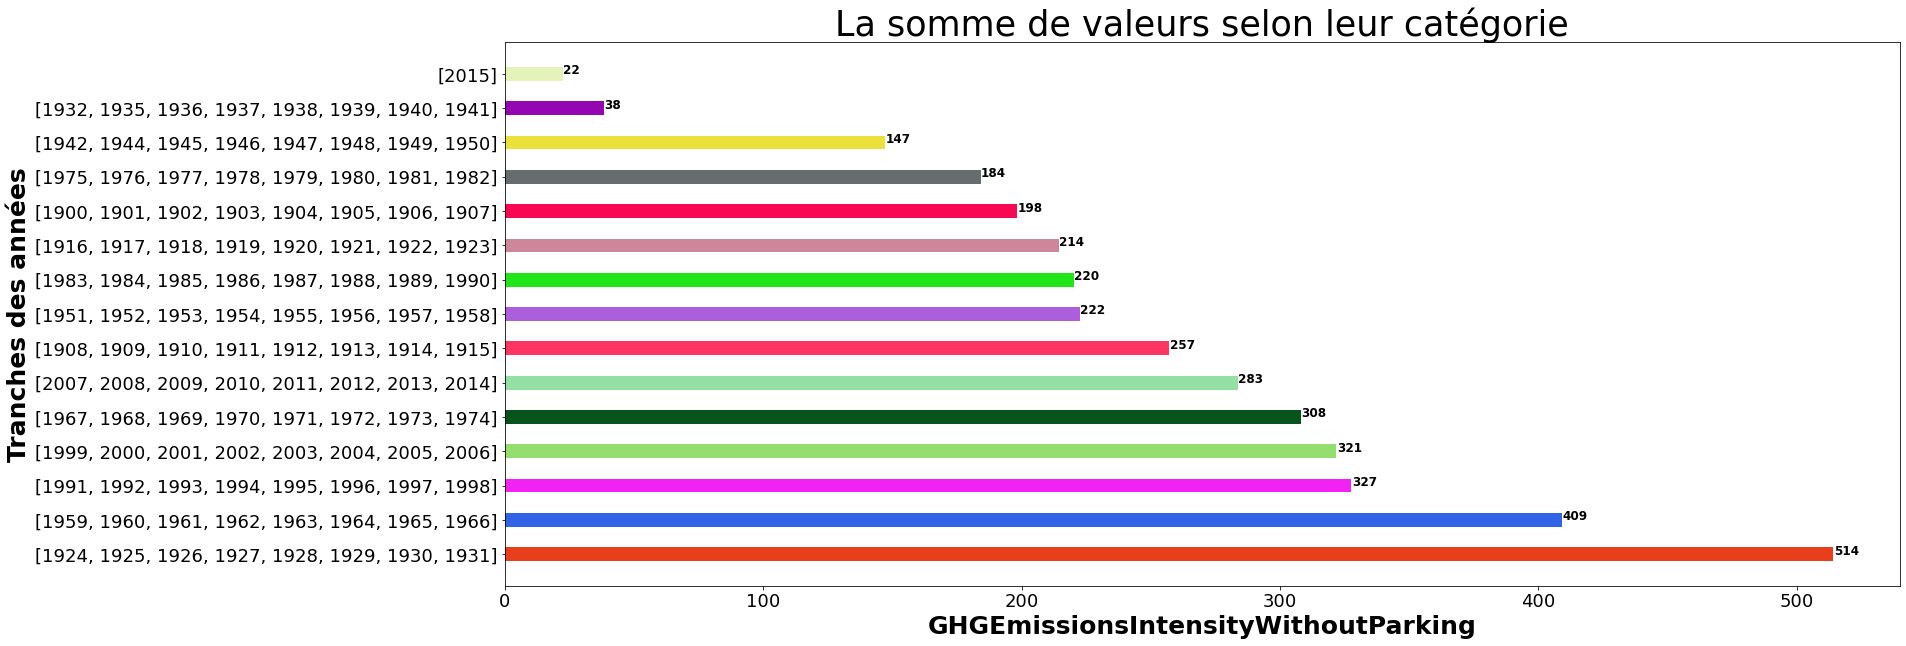

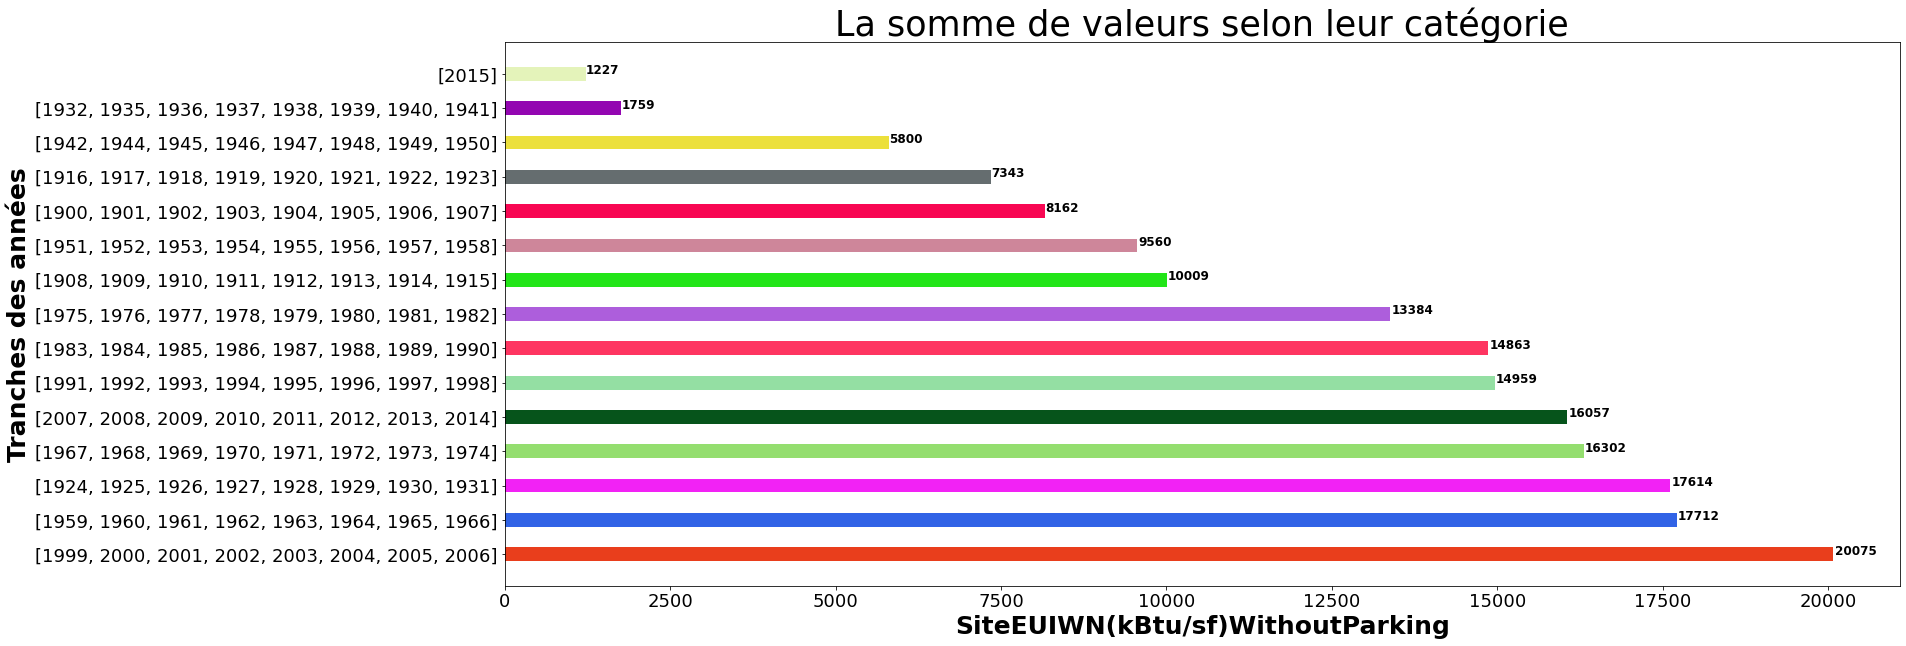

In [24]:
barplot(4,10);

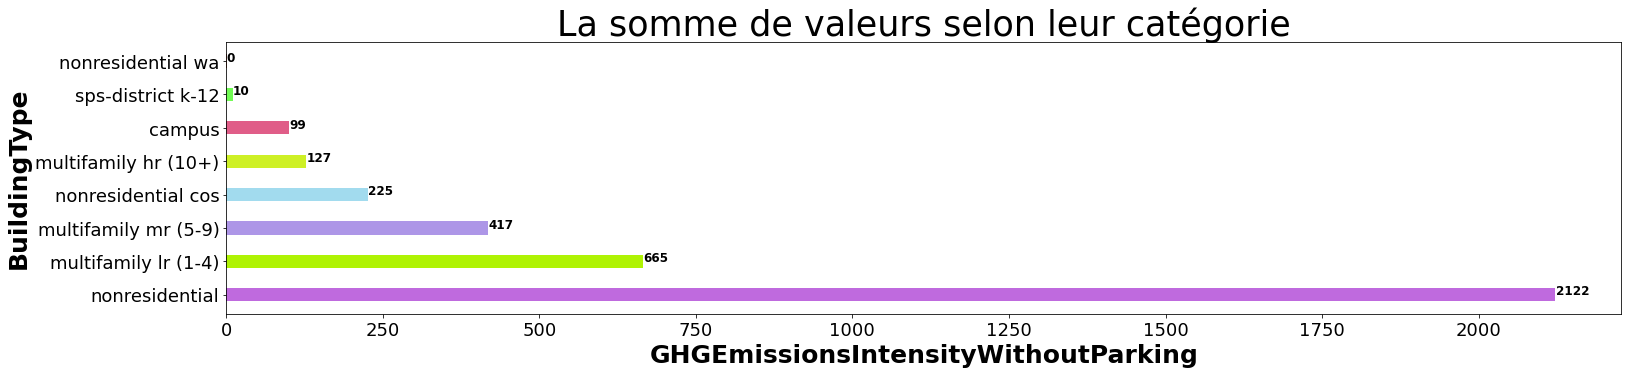

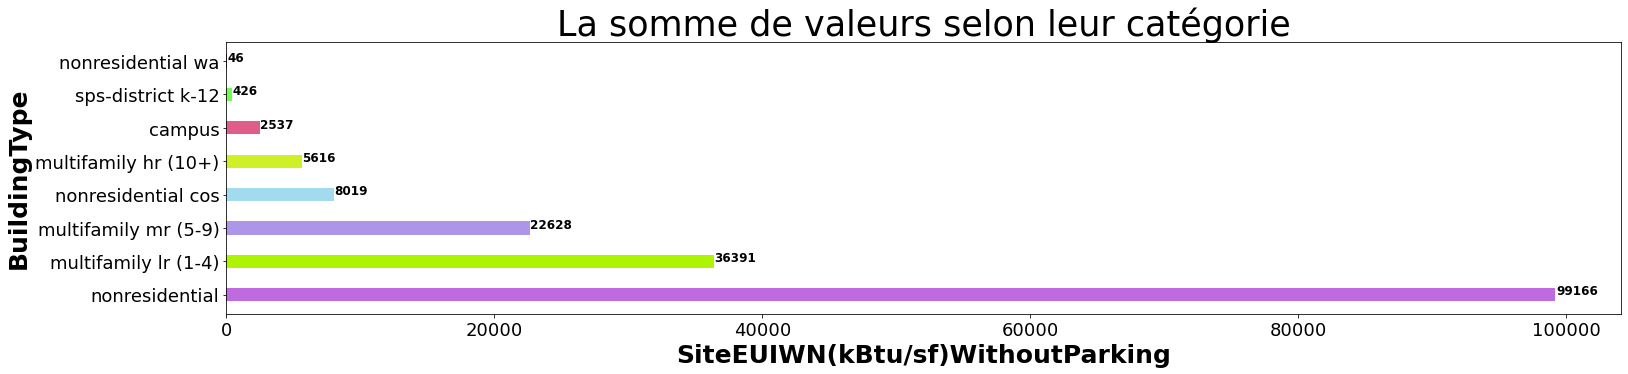

In [26]:
barplot('BuildingType',5);

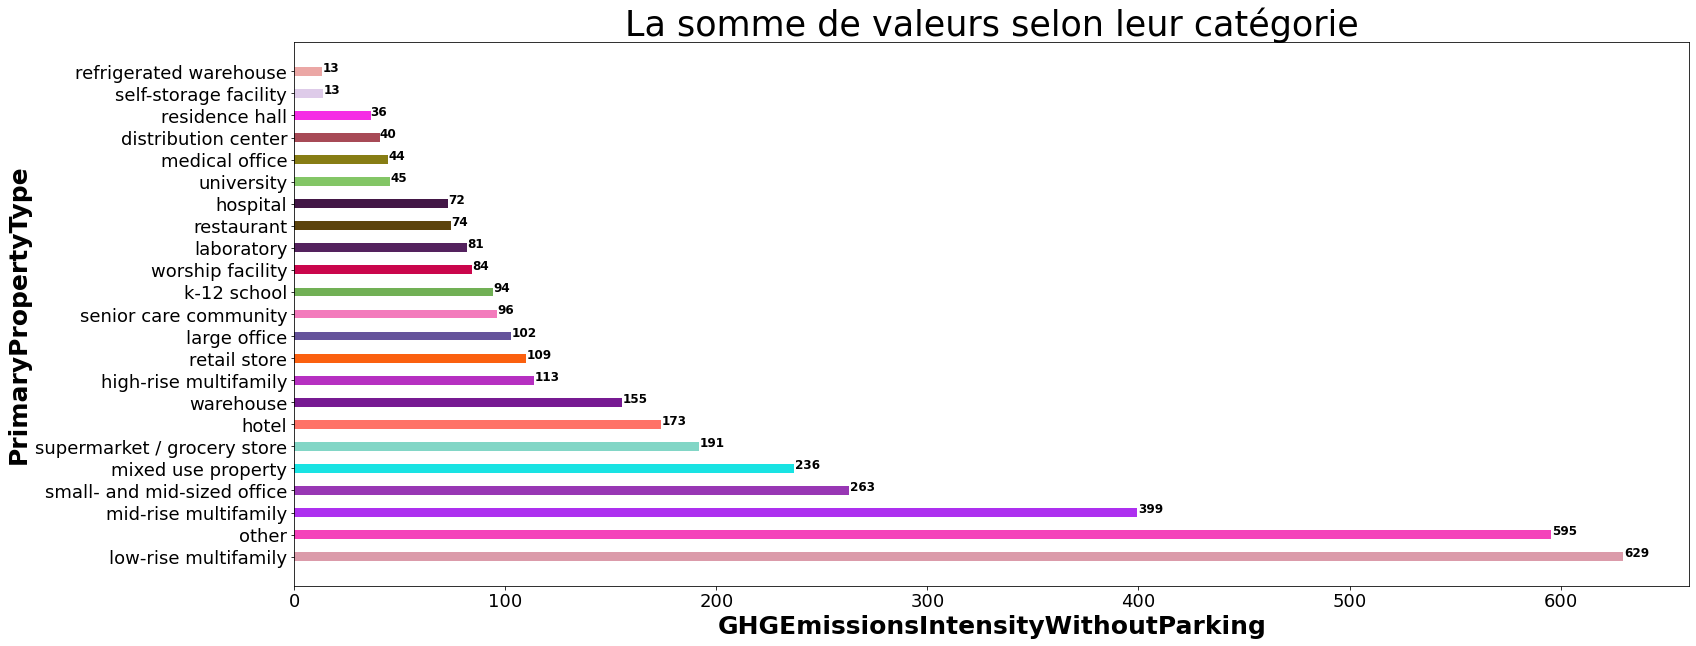

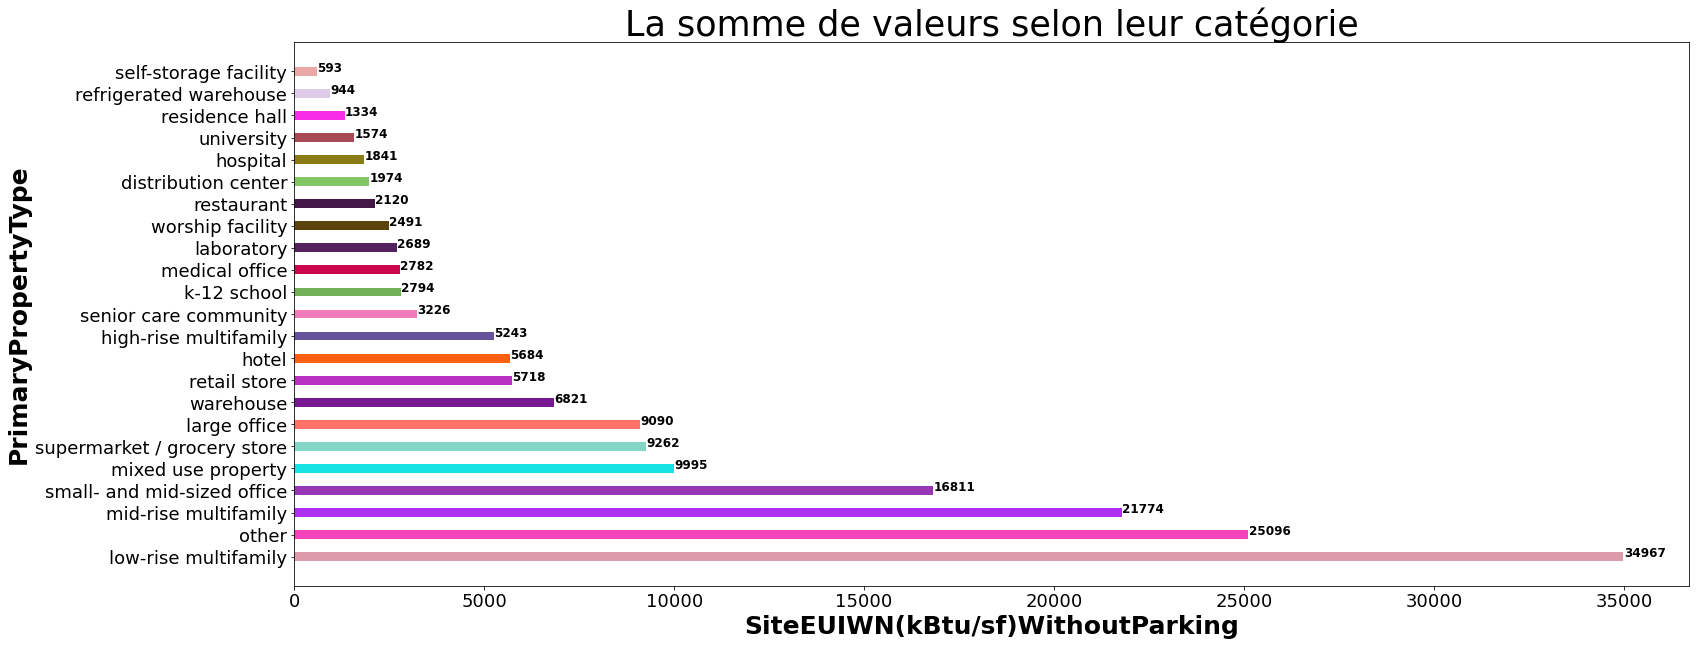

In [28]:
barplot('PrimaryPropertyType',10);

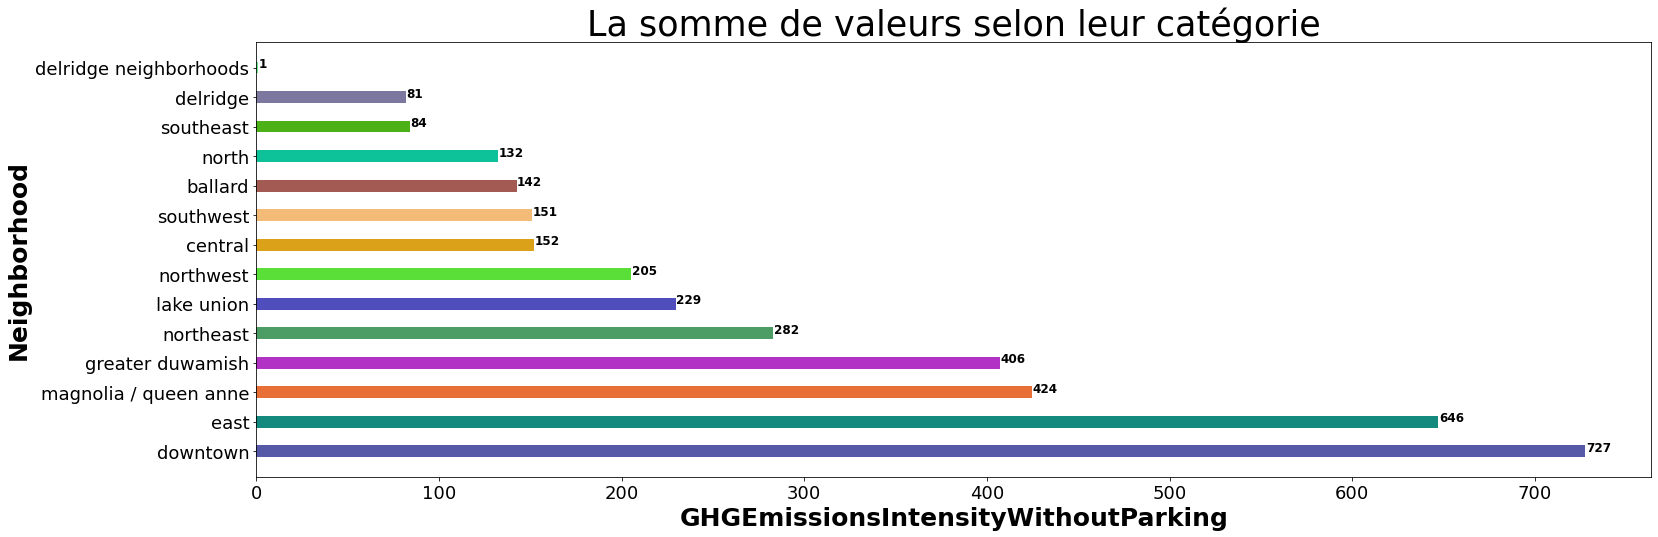

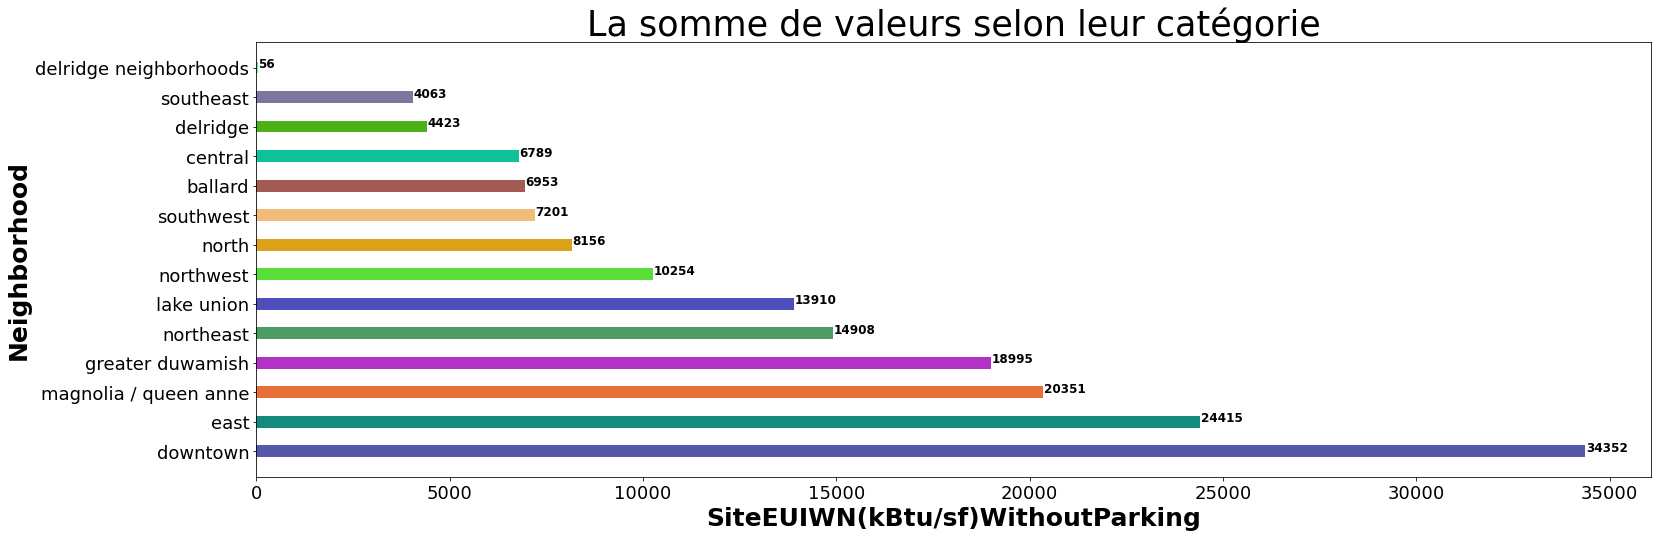

In [29]:
barplot('Neighborhood',8);

### <a name = "62"> 6.2. Avec les features ['NumberofFloors','NumberofBuildings','PropertyGFABuilding(s)'] </a>

<div style="text-align: justify">
La fonction <b><i> barplotwithtable() </i></b> est similaire à la fonction précédente <b><i> barplot() </i></b> avec les mêmes variables. La différence aveccette fonction est la présentation d'un tableau à coté des barres pour les features ['NumberofFloors','Num berofBuildings','PropertyGFABuilding(s)'].

</div>

In [37]:
def barplotwithtable(Choice,FigureHeight):
    
    if Choice==1 or Choice==2 or Choice==3:
        ToReturn=print('Les Choice ne peuvent pas avoir la valoir 1,2 ou 3')
        return ToReturn
    else:
        dfb=df(Choice).reset_index()
        colors = []
        AvoidColorsToUseBackgroundWhiteAndForTableWithBlackWrite=[
            #ToUseBackgroundWhite
            '#F0F8FF','#F0FFFF','#FFFAF0','#FFFFFF','#F5F5F5','#FFFAFA','#F4F4F4','#F5FFFA','#FFFFF0','#FCFCFC','#FAFAFA',
            '#F7F7F7','#F2F2F2','#F8F8FF',
            #ForTableWithBlackWritting
            '#000000','#030303','#1C1C1C','#1F1F1F','#212121','#242424','#262626','#292929','#2B2B2B','#2E2E2E','#303030',
            '#050505','#333333','#363636','#383838','#3B3B3B','#3D3D3D','#404040','#424242','#454545','#474747','#4A4A4A',
            '#080808','#0A0A0A','#0D0D0D','#0F0F0F','#121212','#141414','#171717','#292421','#1E1E1E','#282828'
        ]
        for i in range(len(dfb)):
            colorHex='#%06X' % np.random.randint(0, 0xFFFFFF)
            while colorHex in AvoidColorsToUseBackgroundWhiteAndForTableWithBlackWrite:
                colorHex='#%06X' % np.random.randint(0, 0xFFFFFF)
            colors.append(colorHex) 
        CellColors=[]
        i=0
        for x in range(len(colors)):
            CellColors.append([colors[::-1][i]]*3)   
            i+=1
            
            
        allfig=[]
        if Choice==4:
            Choice='Tranches des années'
        for x in ['GHGEmissionsIntensityWithoutParking','SiteEUIWN(kBtu/sf)WithoutParking']:  
            dfForBarh=pd.DataFrame({x:dfb[x],'Y':dfb['index'].apply(lambda x: str(x)),
                                   'NumberofFloors':dfb['NumberofFloors'],
                                   'NumberofBuildings':dfb['NumberofBuildings'],
                                    'PropertyGFABuilding(s)':dfb['PropertyGFABuilding(s)']
                                   }).sort_values(by=[x],ascending=False).reset_index()
            fig,ax=plt.subplots(figsize=(40,FigureHeight))
            ax.set_facecolor('white')
            fig=plt.title('La somme de valeurs selon leur catégorie', size=85)
            fig=plt.xlabel(x,fontsize=60,fontweight='bold')
            fig=plt.ylabel(Choice,fontsize=60,fontweight='bold')
            bars=plt.barh(dfForBarh['Y'],dfForBarh[x],height=0.4,color=colors)
            fig=plt.tick_params(axis='both', which='major', labelsize=45)

            i=0
            for g in bars:
                width = g.get_width()
                height = g.get_height()
                X, Y = g.get_xy()
                fig=plt.text(X+width*1.001, Y+height/2,str(int(dfForBarh[x][i])),fontsize=35,fontweight='bold')
                i+=1
            
            table = plt.table(cellText=dfForBarh[::-1].iloc[:,3:].values,
                      #rowColours=colors[::-1], Pour mettre les couleurs comme index 
                      cellColours=CellColors,
                      colLabels=['NumberofFloors','NumberofBuildings','PropertyGFABuilding(s)'],
                      cellLoc='left',
                      colLoc='left',
                      bbox = [1.01, 0.032,.8,1],
                      colWidths = [0.5]*3
                      )
 
            from matplotlib.font_manager import FontProperties
            for (row, col), cell in table.get_celld().items():
                if row==0:
                    cell.set_text_props(fontproperties=FontProperties(weight='bold',size=40))
                else:
                    cell.set_text_props(fontproperties=FontProperties(weight='bold',size=35))
            
            allfig.append(fig)

        return allfig

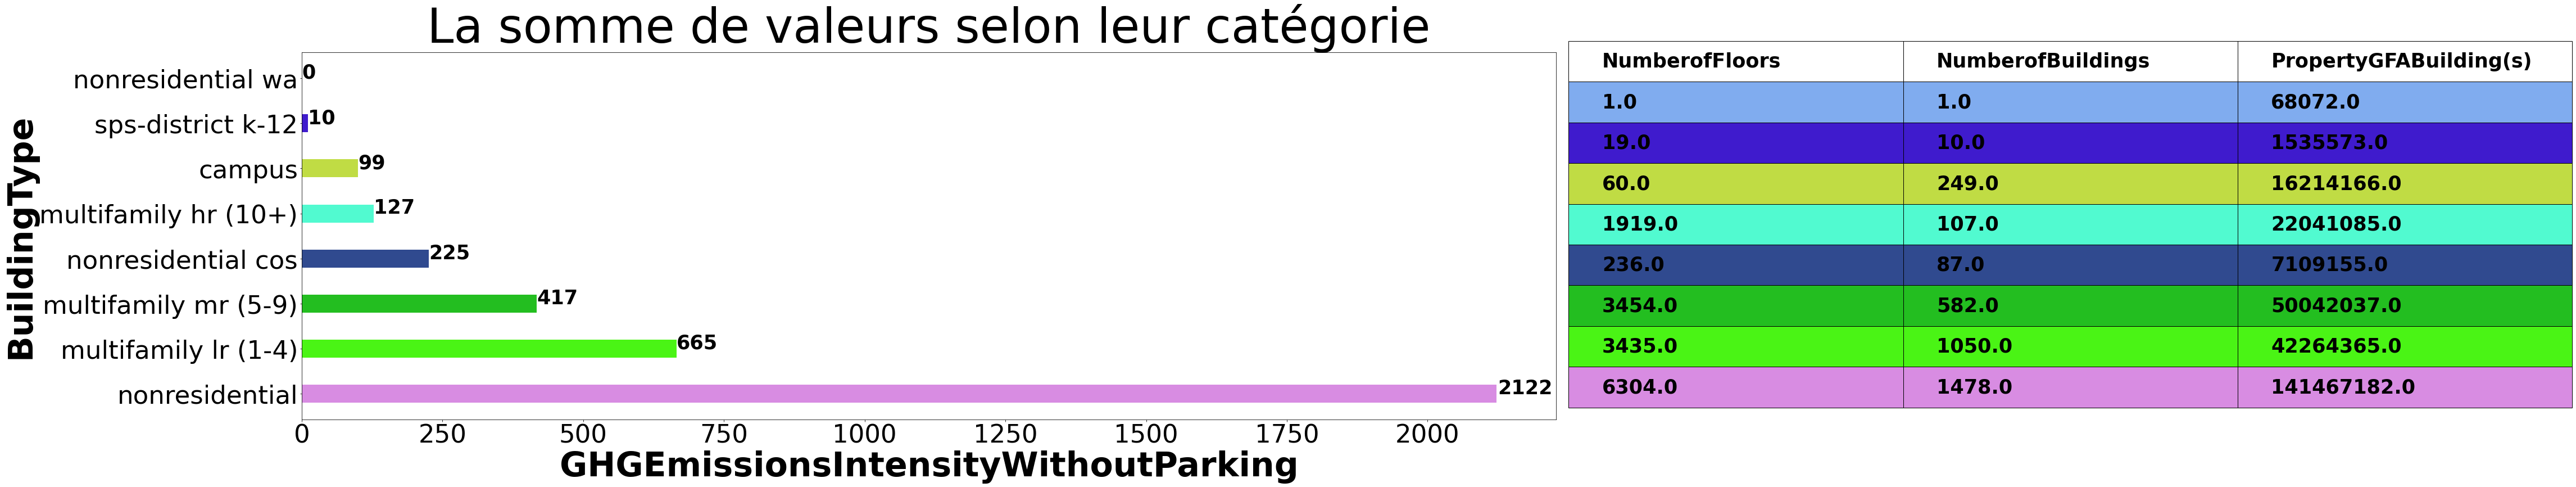

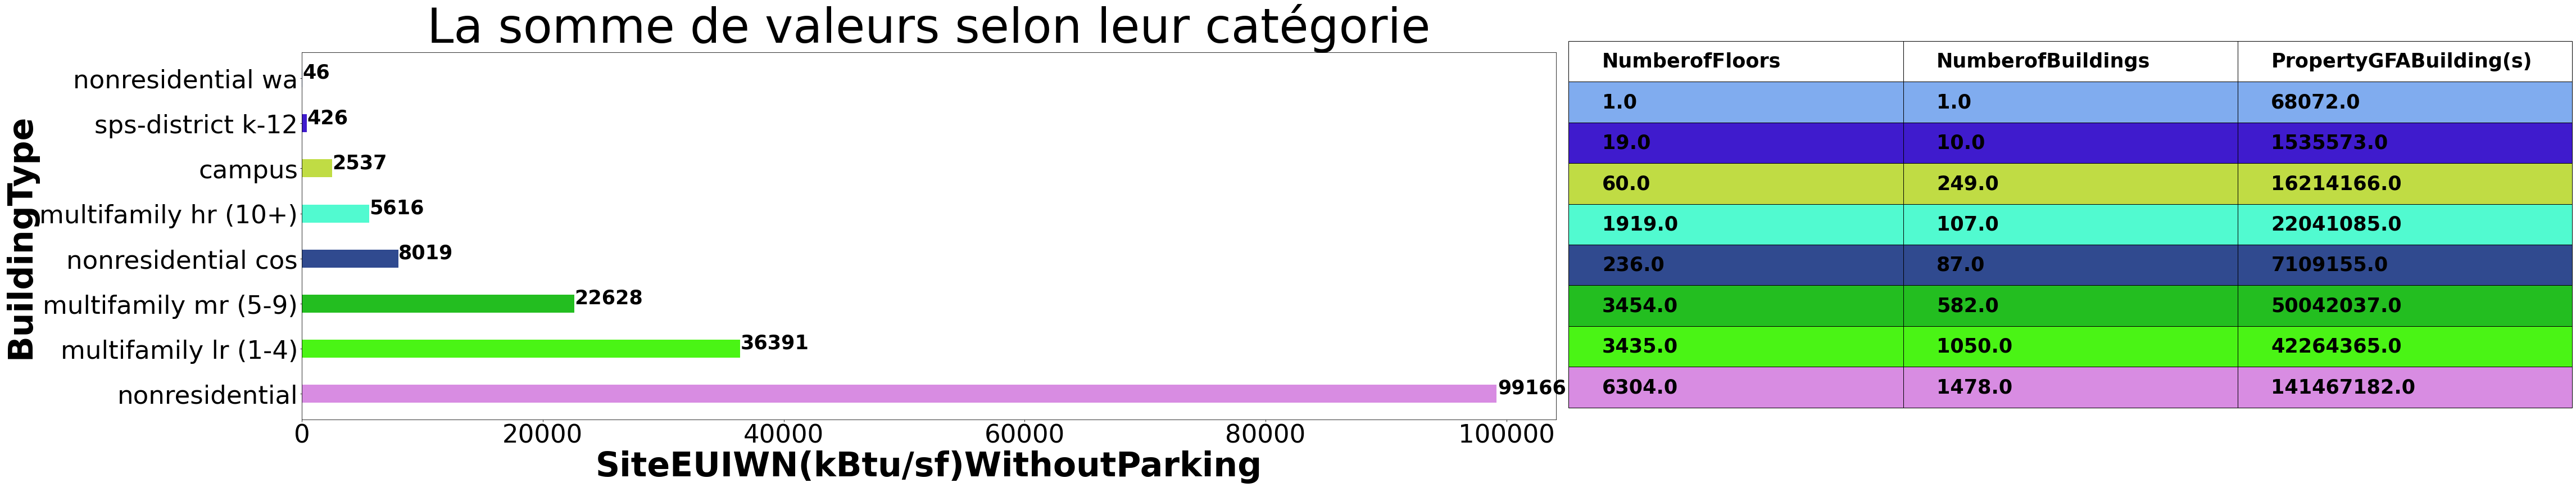

In [34]:
barplotwithtable('BuildingType',12);

Combien d'années par tranche vous souhaitez entre(1-112):8


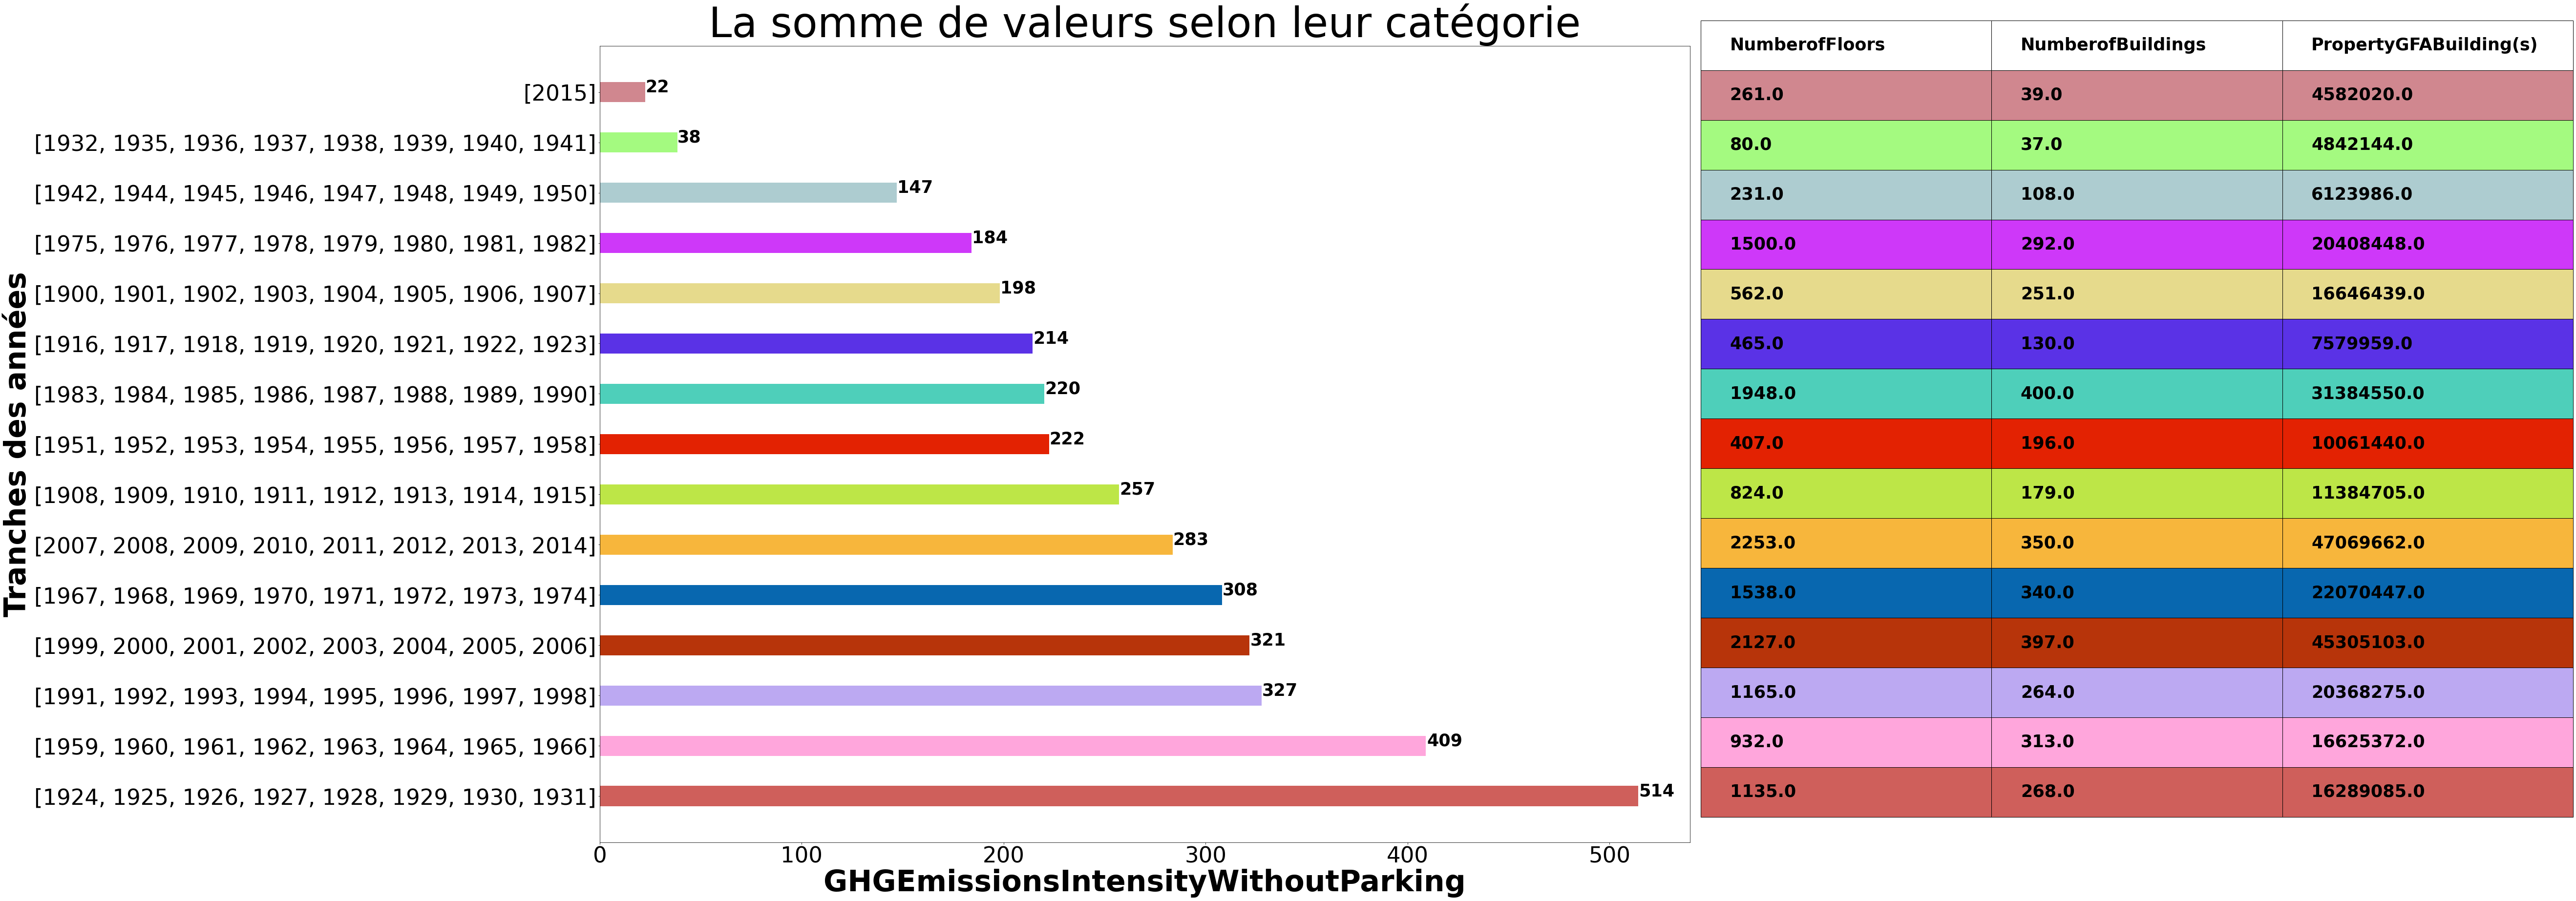

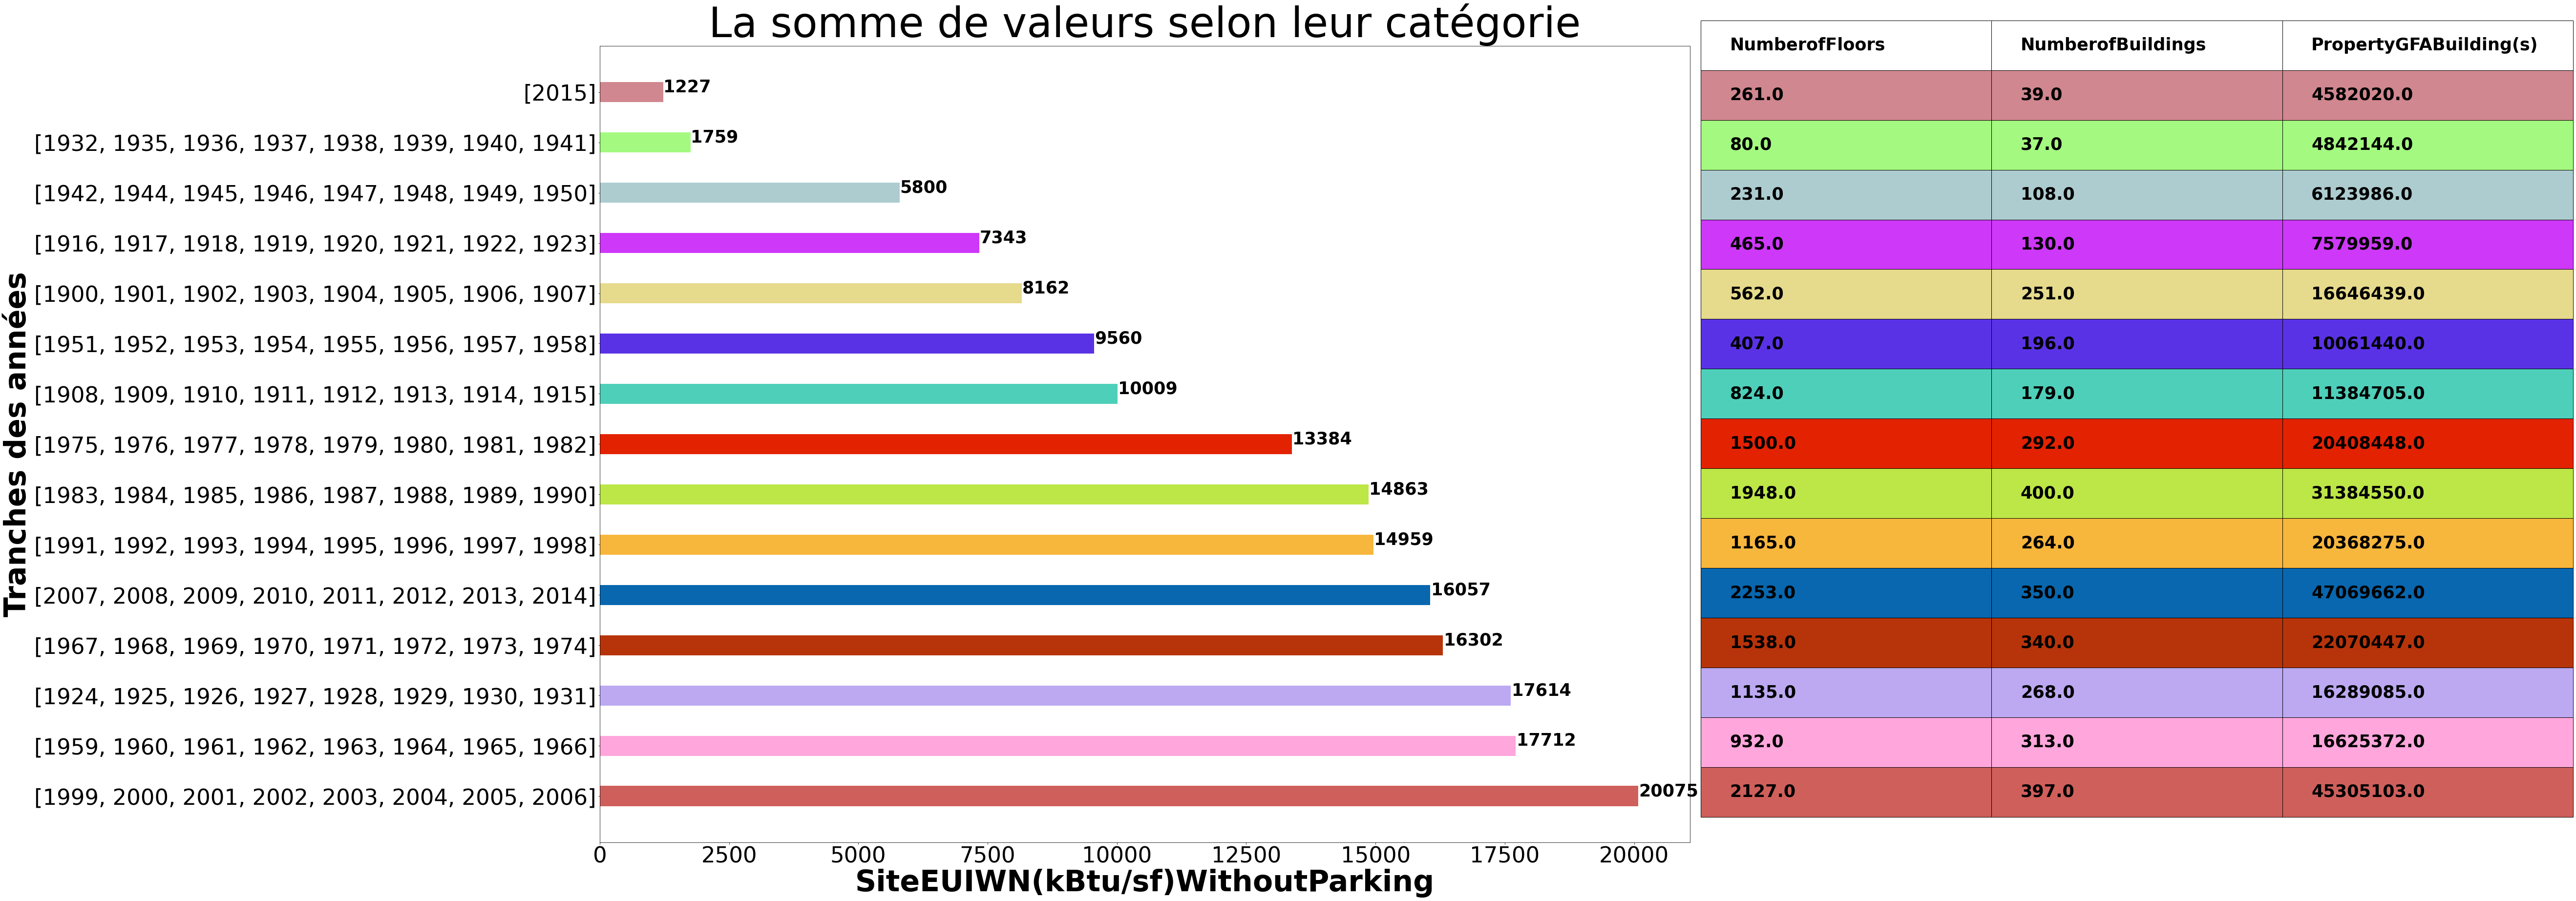

In [50]:
barplotwithtable(4,30);

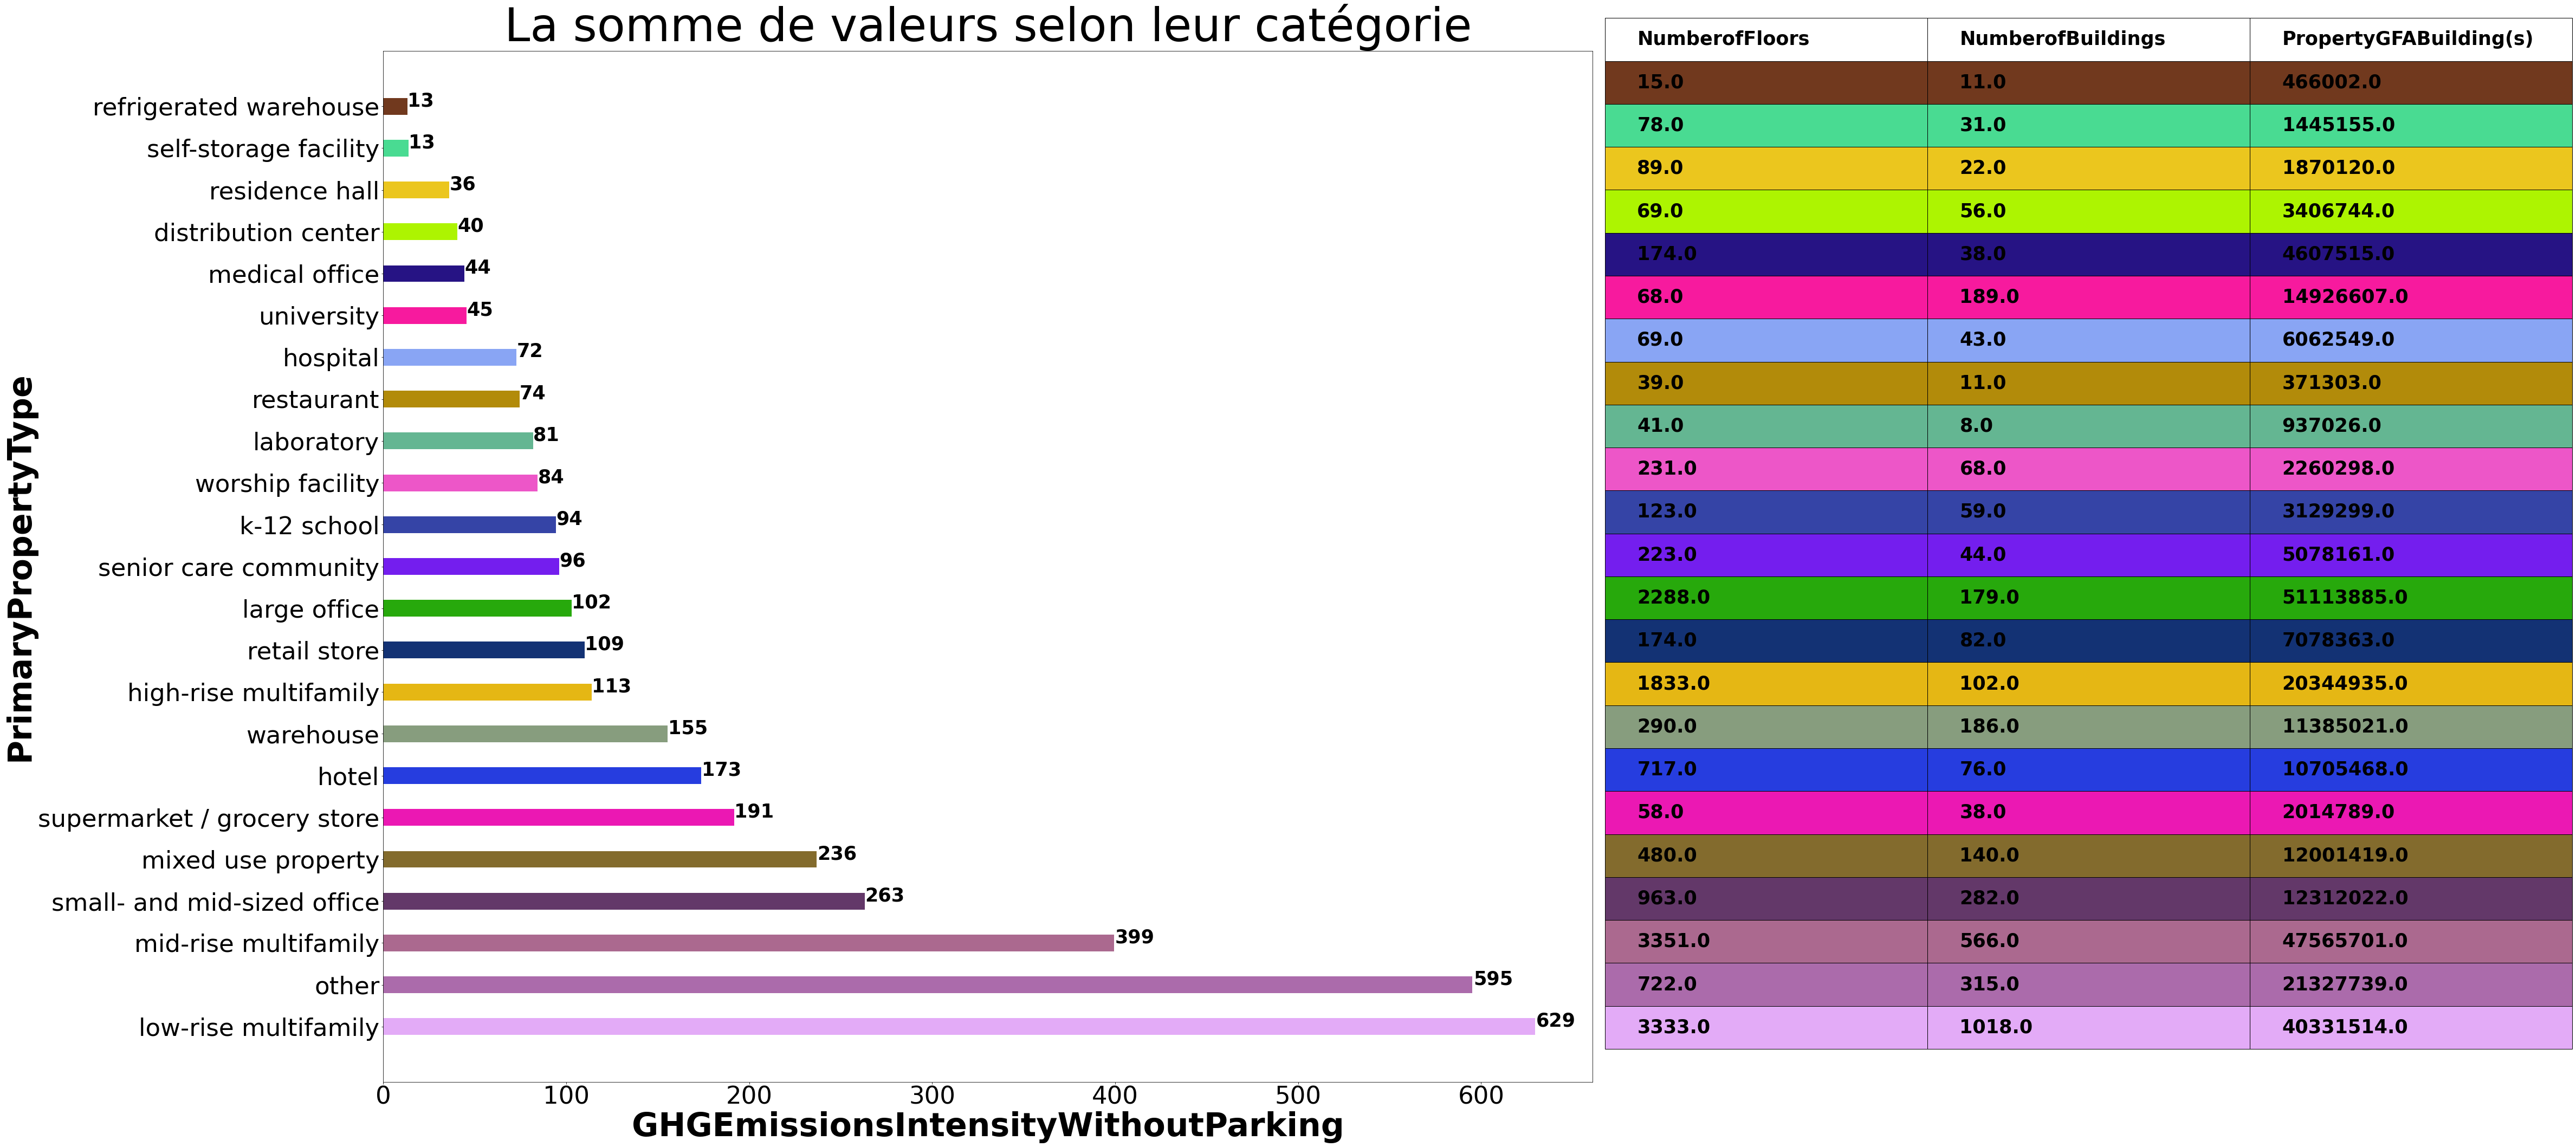

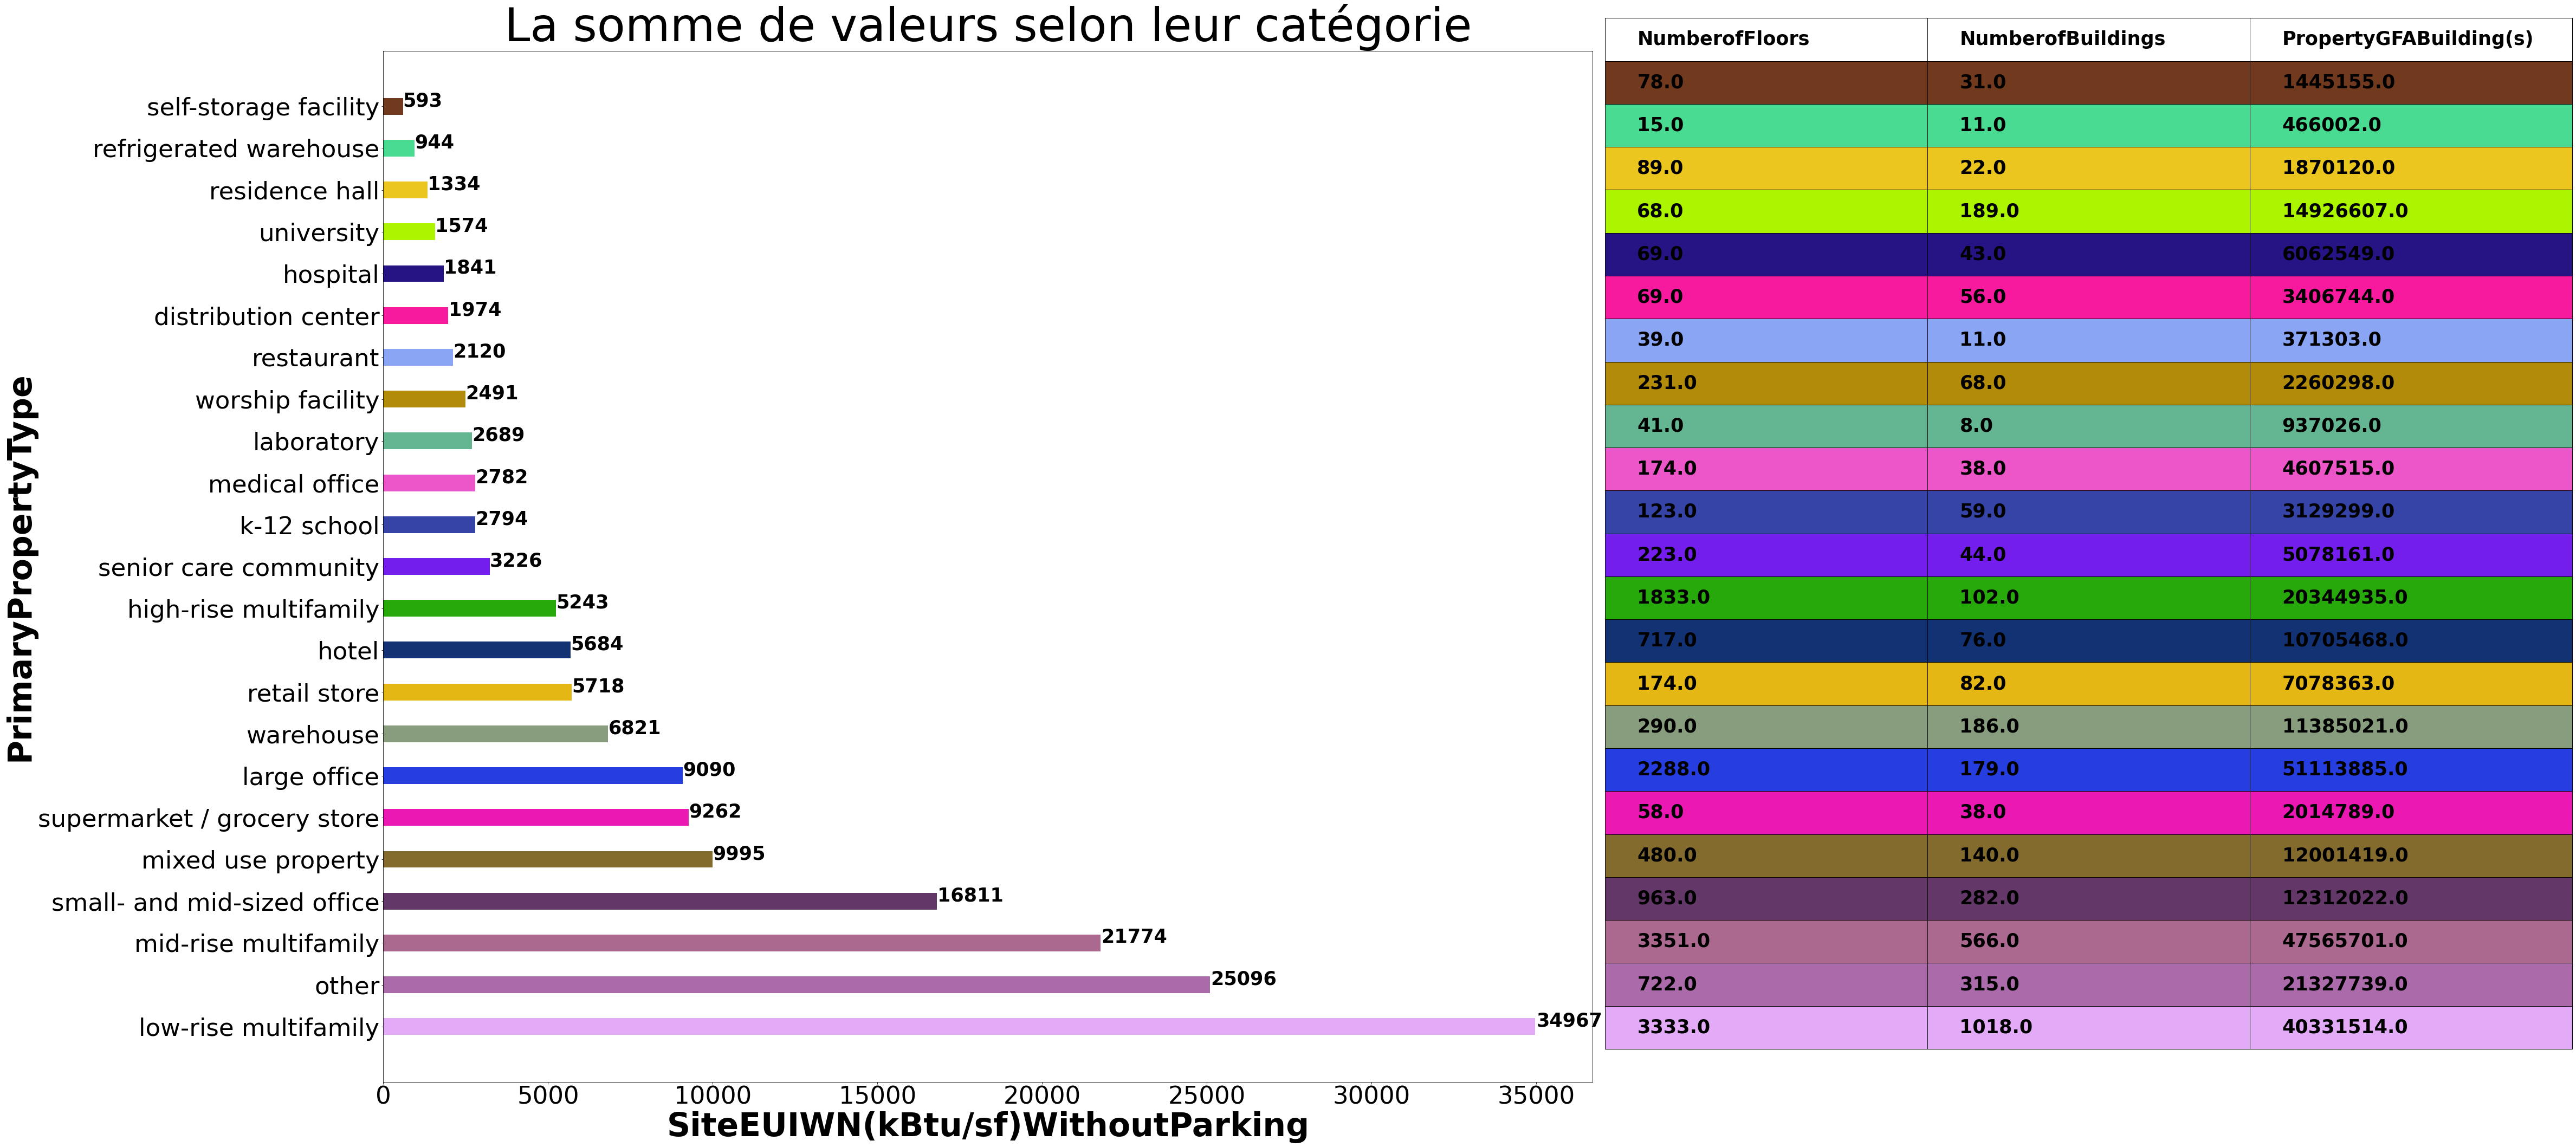

In [48]:
barplotwithtable('PrimaryPropertyType',35);

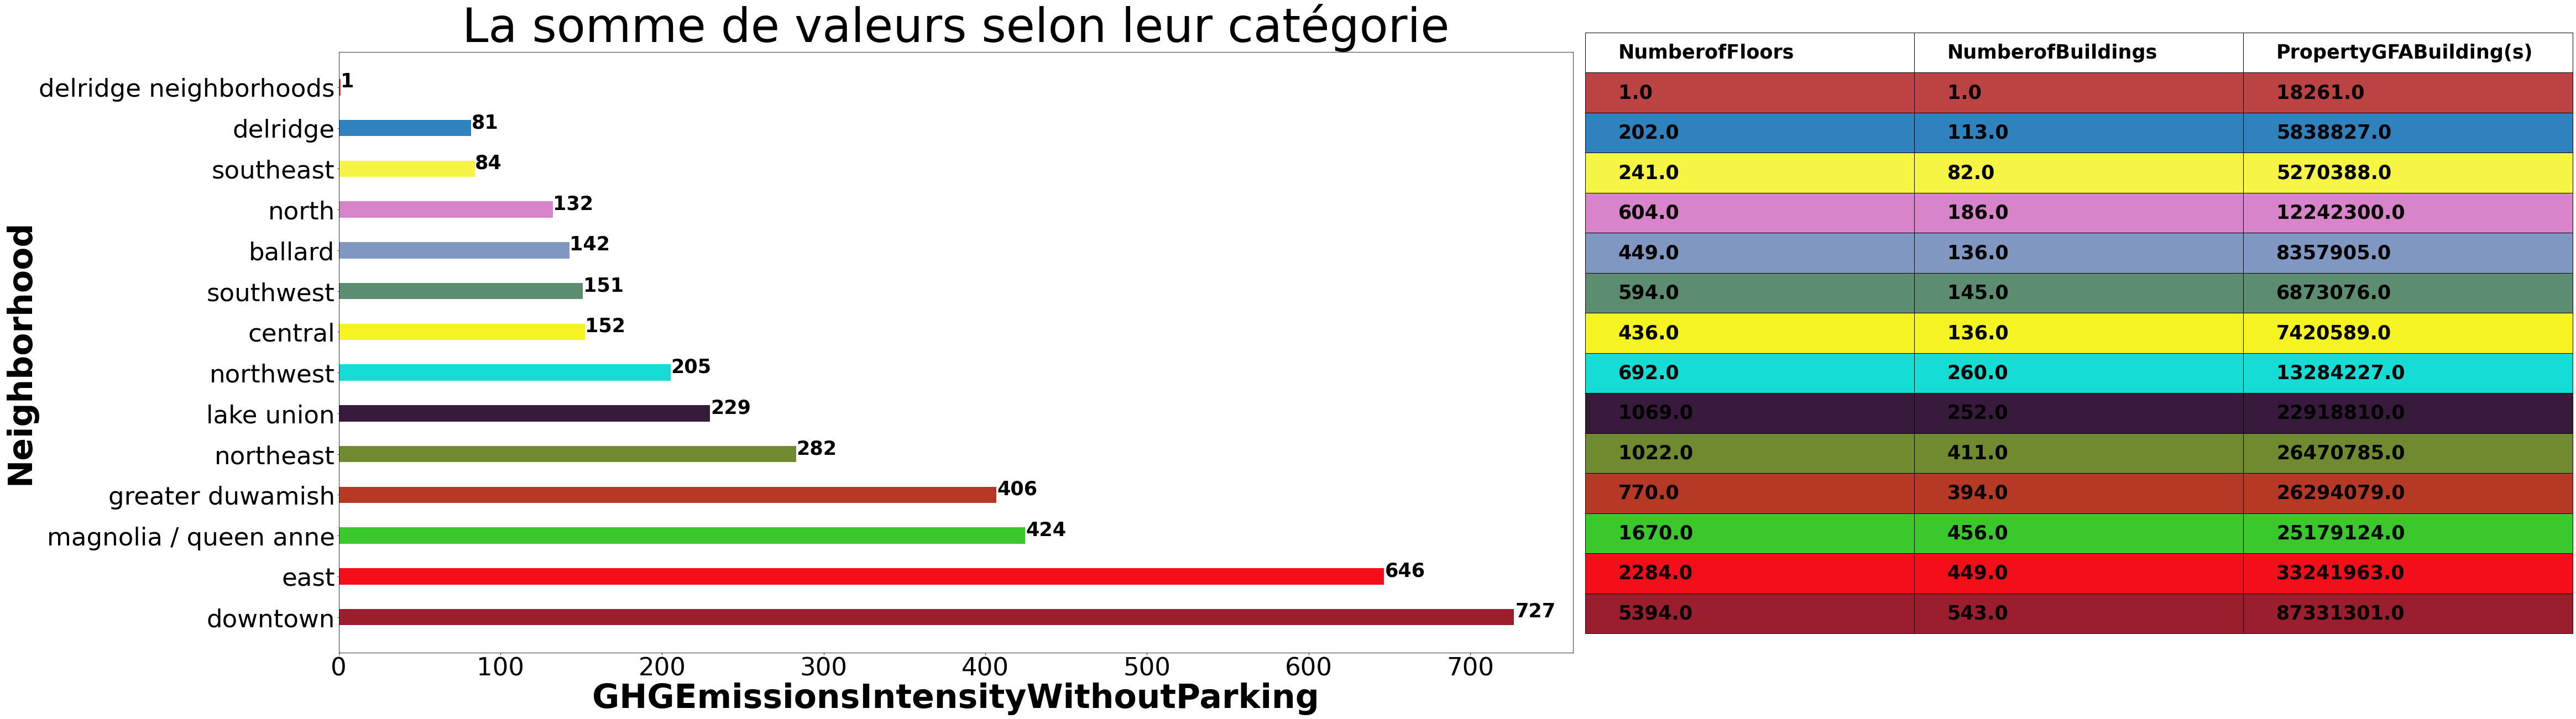

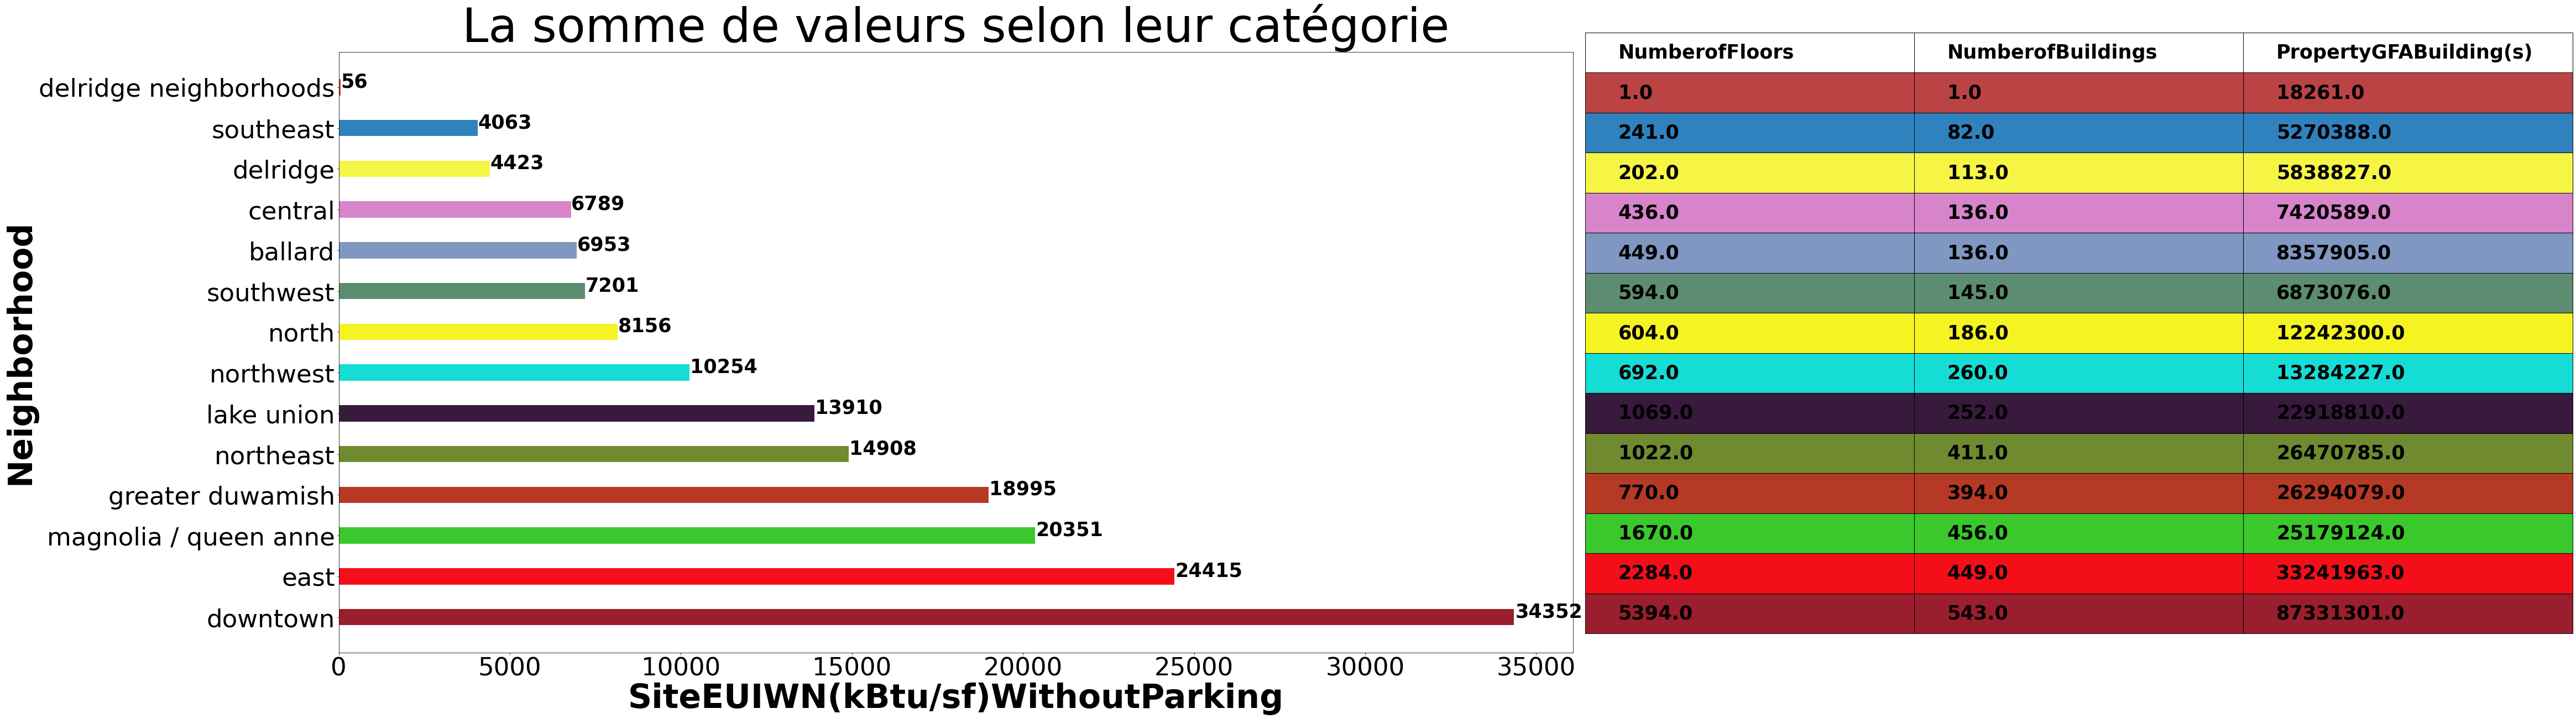

In [51]:
barplotwithtable('Neighborhood',20);

<div style="text-align: justify">
Allez au NoteBook2 du premier target.
</div>